In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
import plotly.express as px

In [2]:
## Leemos nuestros datos y los visualizamos
df = pd.read_csv('datasets/df_complete_lat_long.csv')
df.head(3)

terreno  construccion  recamaras  banos  estacionamientos  \
0     61.5          61.5        2.0    1.0                 1   
1     55.2          55.2        1.0    1.0                 1   
2     42.0          42.0        1.0    1.0                 0   

                                           ubicacion     precio  \
0  Doctores, Cuauhtémoc, Ciudad De México 06720, ...  2900000.0   
1  Doctores, Cuauhtémoc, Ciudad De México 06720, ...  3200000.0   
2  Roma Norte, Cuauhtémoc, Ciudad De México 06700...  2137000.0   

   anio_construct    cp    alcaldia       colonia  grado_marginalidad  \
0          2022.0  6720  CUAUHTEMOC    DOCTORES I                 5.0   
1          2018.0  6720  CUAUHTEMOC    DOCTORES I                 5.0   
2          1972.0  6700  CUAUHTEMOC  ROMA NORTE I                 3.0   

   pob_2010 tipo_seccion tipo_col      precio_str                   lat_long  \
0   44703.0    URBANO(A)  COLONIA  $2,900,000 MXN  (19.4326296, -99.1331785)   
1   44703.0    URBANO(A)  COLONIA  $3,200,000 MXN  (19.4326296, -99.1331785)   
2   27770.0    URBANO(A)  COLONIA  $2,137,000 MXN  (19.4326296, -99.1331785)   

        lat       long  
0  19.43263 -99.133178  
1  19.43263 -99.133178  
2  19.43263 -99.133178

In [3]:
## Obtenemos la descripcion de nuestros datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   terreno             1068 non-null   float64
 1   construccion        1068 non-null   float64
 2   recamaras           1068 non-null   float64
 3   banos               1068 non-null   float64
 4   estacionamientos    1068 non-null   int64  
 5   ubicacion           1068 non-null   object 
 6   precio              1068 non-null   float64
 7   anio_construct      1068 non-null   float64
 8   cp                  1068 non-null   int64  
 9   alcaldia            1068 non-null   object 
 10  colonia             1068 non-null   object 
 11  grado_marginalidad  1068 non-null   float64
 12  pob_2010            1068 non-null   float64
 13  tipo_seccion        1068 non-null   object 
 14  tipo_col            1068 non-null   object 
 15  precio_str          1068 non-null   object 
 16  lat_lo

In [4]:
## Obtenemos lor principales medidas estadisticas de resumen
df.describe()

terreno  construccion    recamaras        banos  estacionamientos  \
count  1068.000000   1068.000000  1068.000000  1068.000000       1068.000000   
mean    224.533521    206.178933     3.013109     2.422285          2.331461   
std     392.572682    187.582327     1.502830     1.373381          6.900733   
min      18.000000     30.000000     1.000000     1.000000          0.000000   
25%      75.000000     79.000000     2.000000     2.000000          1.000000   
50%     125.000000    140.000000     3.000000     2.000000          2.000000   
75%     218.000000    270.000000     3.000000     3.000000          2.000000   
max    7671.000000   2000.000000    15.000000    17.000000        215.000000   

             precio  anio_construct            cp  grado_marginalidad  \
count  1.068000e+03     1068.000000   1068.000000         1068.000000   
mean   8.398544e+06     1996.877341   6680.009363            2.538390   
std    1.056286e+07       25.758465   4410.354391            1.351672   
min    6.800000e+05     1893.000000   1000.000000            1.000000   
25%    3.300000e+06     1983.000000   3230.000000            1.000000   
50%    5.419530e+06     2004.000000   5300.000000            2.000000   
75%    9.158750e+06     2018.000000   9852.500000            4.000000   
max    1.350000e+08     2025.000000  16770.000000            5.000000   

            pob_2010           lat         long  
count    1068.000000  1.068000e+03  1068.000000  
mean    14059.282772  1.943263e+01   -99.133178  
std     14576.235171  3.554378e-15     0.000000  
min       355.000000  1.943263e+01   -99.133178  
25%      5248.750000  1.943263e+01   -99.133178  
50%      9815.000000  1.943263e+01   -99.133178  
75%     17464.000000  1.943263e+01   -99.133178  
max    111728.000000  1.943263e+01   -99.133178

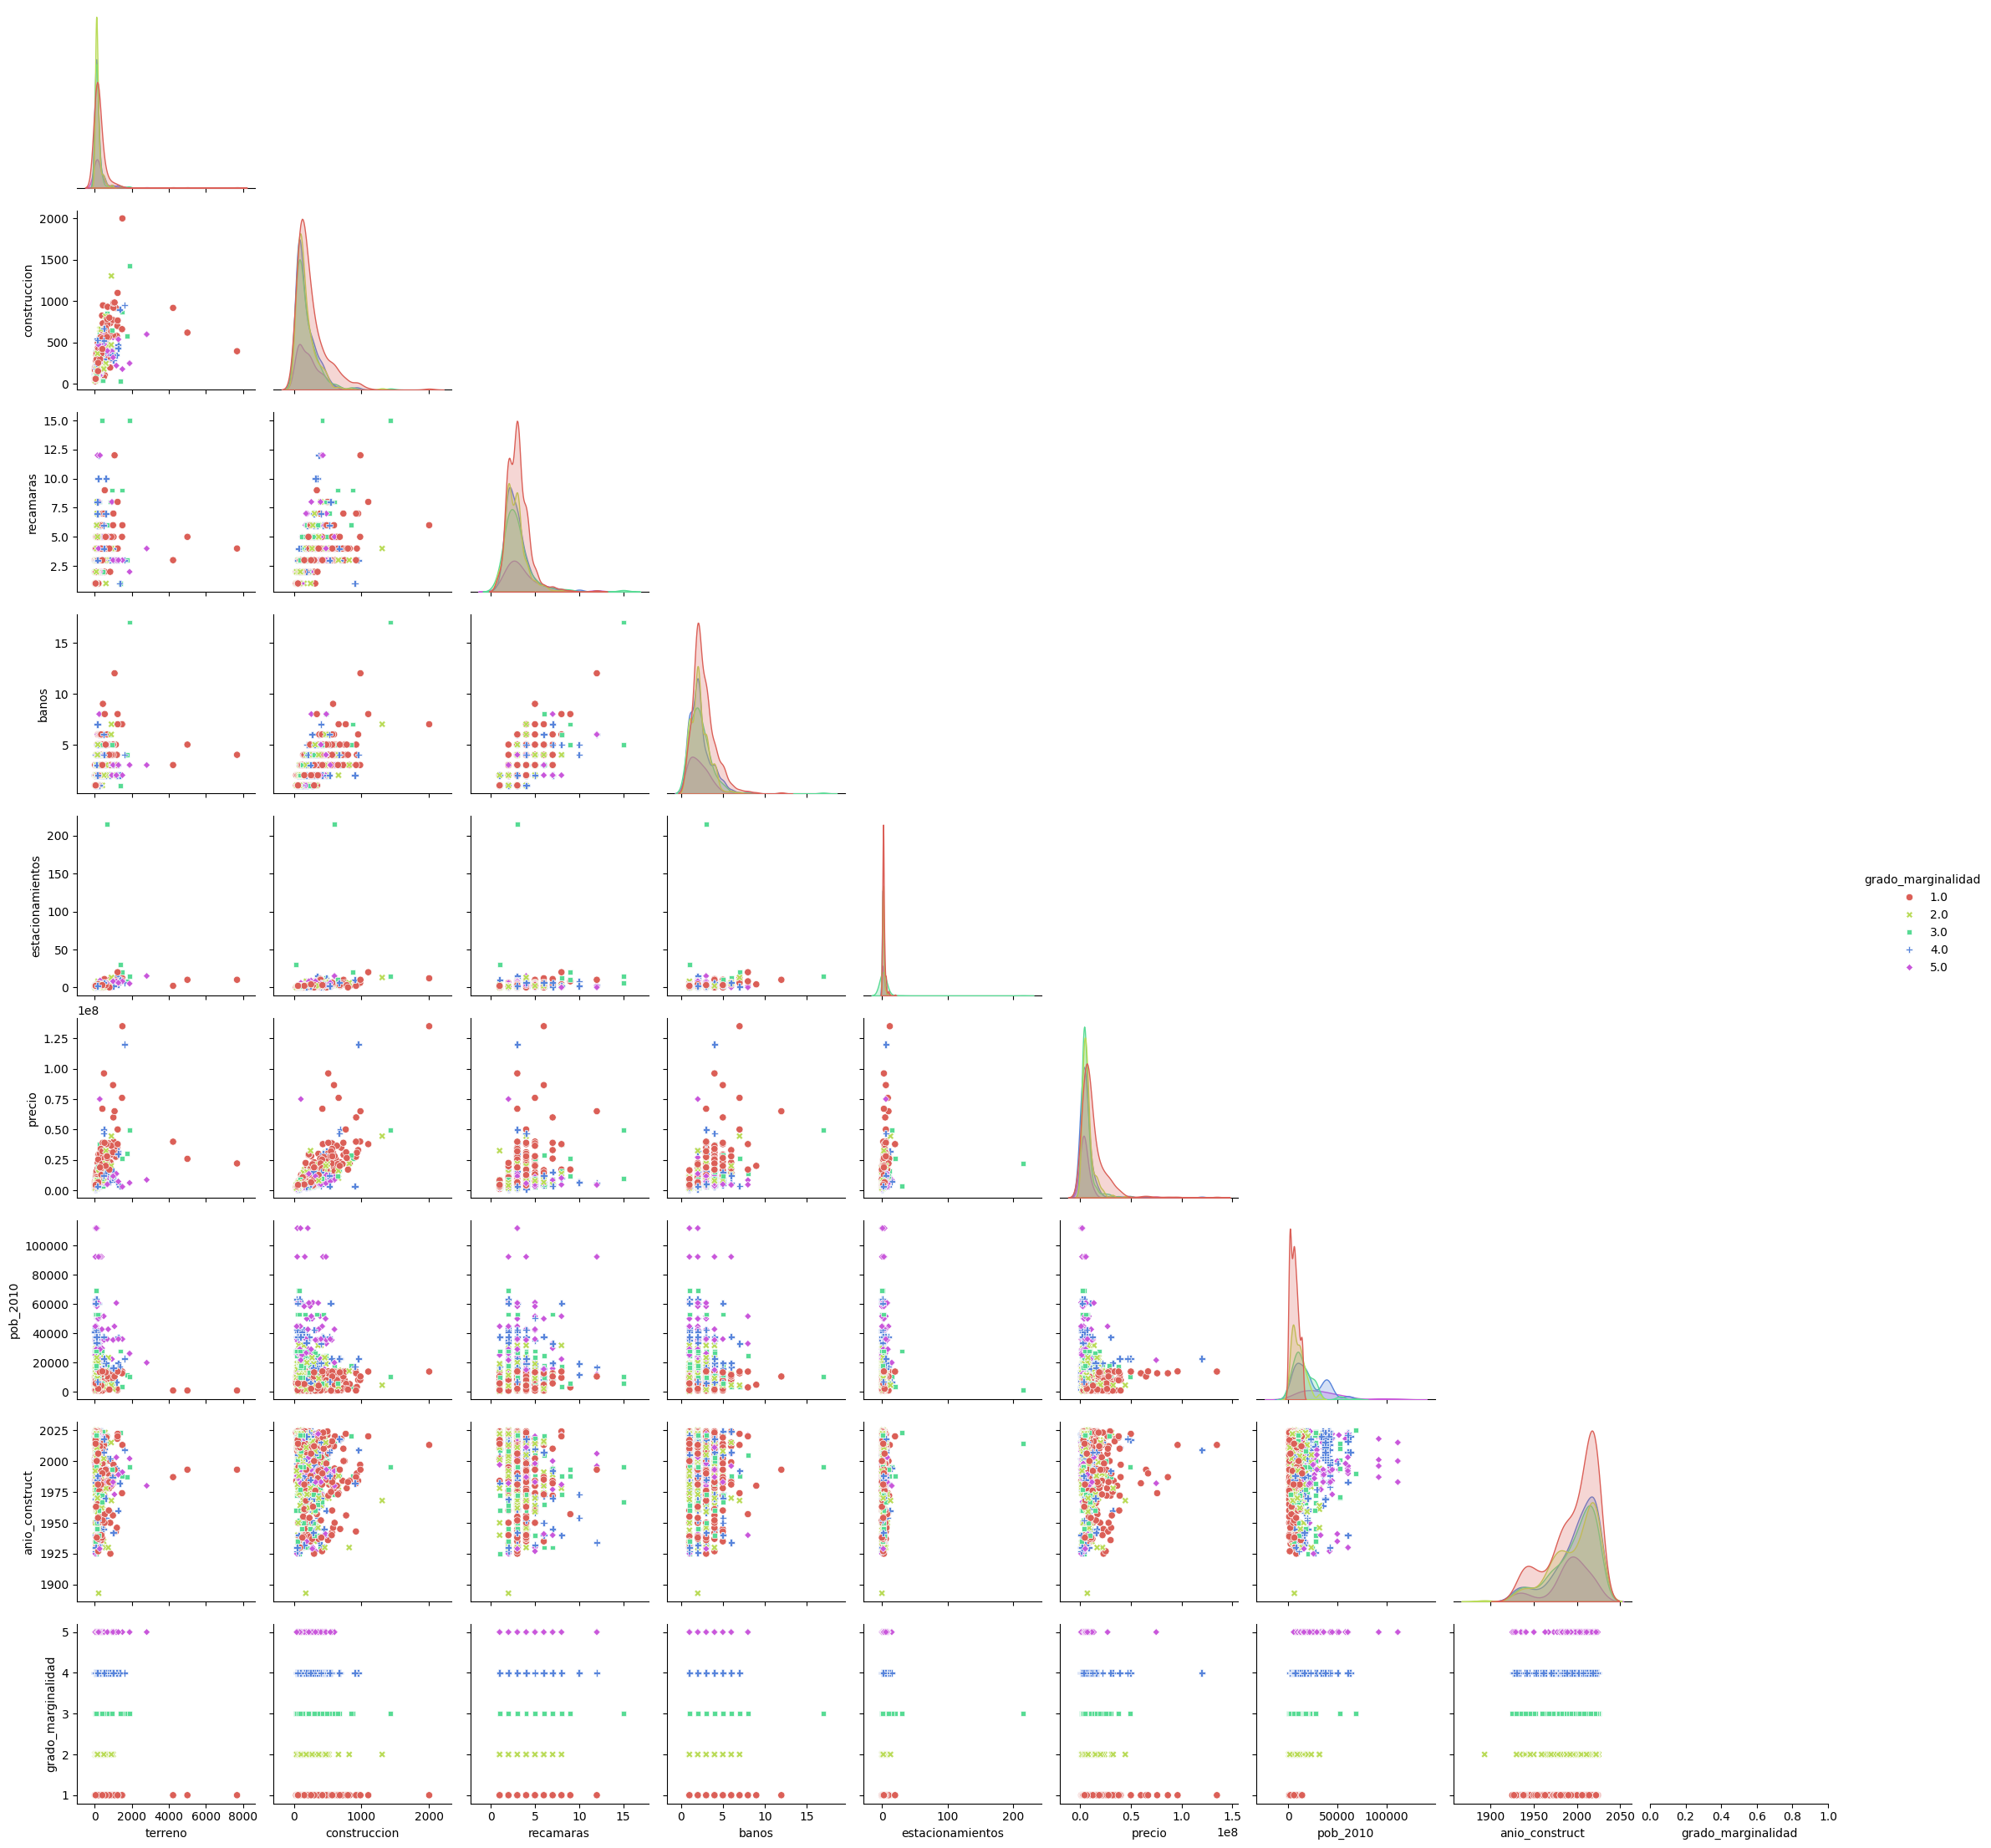

In [5]:
## Comenzamos a graficar nuestros datos
# Graficaremos todas las relaciones de nuestros 
sbn.pairplot(df, corner=True, vars=['terreno','construccion','recamaras','banos','estacionamientos','precio',
                                    'pob_2010','anio_construct','grado_marginalidad'], hue='grado_marginalidad', 
             palette=sbn.color_palette("hls", 5), markers=True)

Datos totales 1068
Media 224.53352059925098 Mediana 125.0 Desviacion std 392.5726821833009
Quaniles:
0.25     75.000
0.50    125.000
0.75    218.000
0.97    996.151
Name: terreno, dtype: float64
Inmuebles por debajo de 1000m2 1037 0.9709737827715356%


<Axes: xlabel='terreno'>

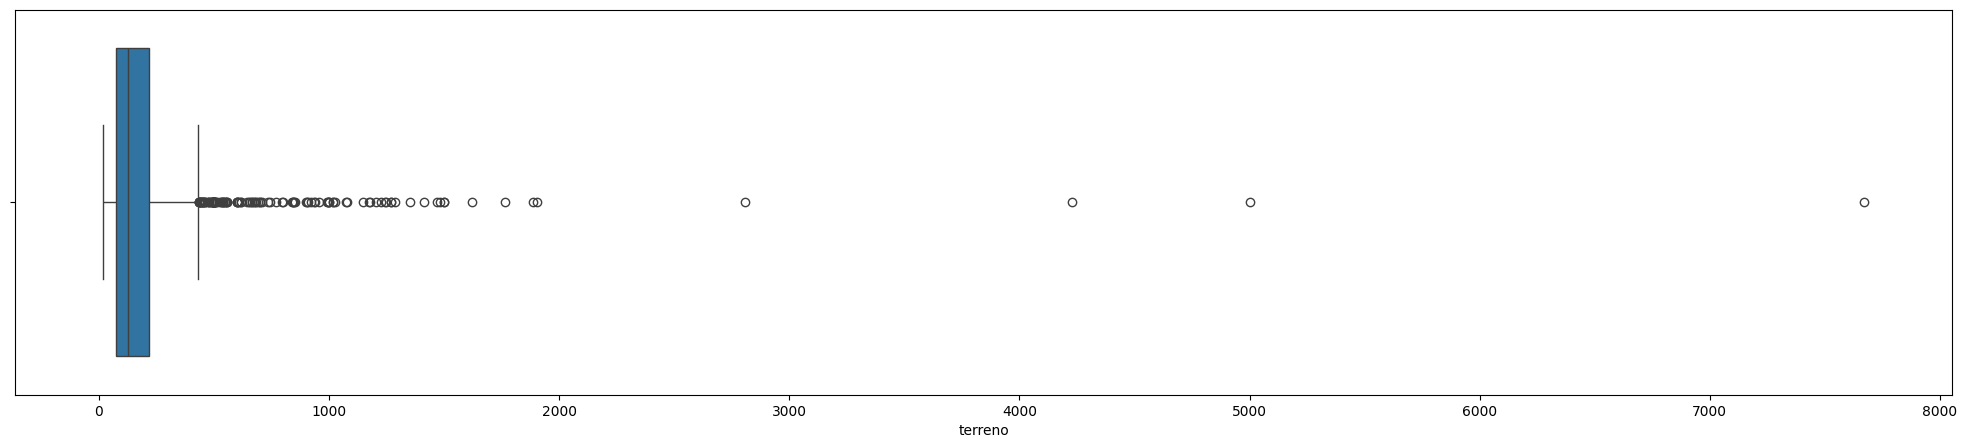

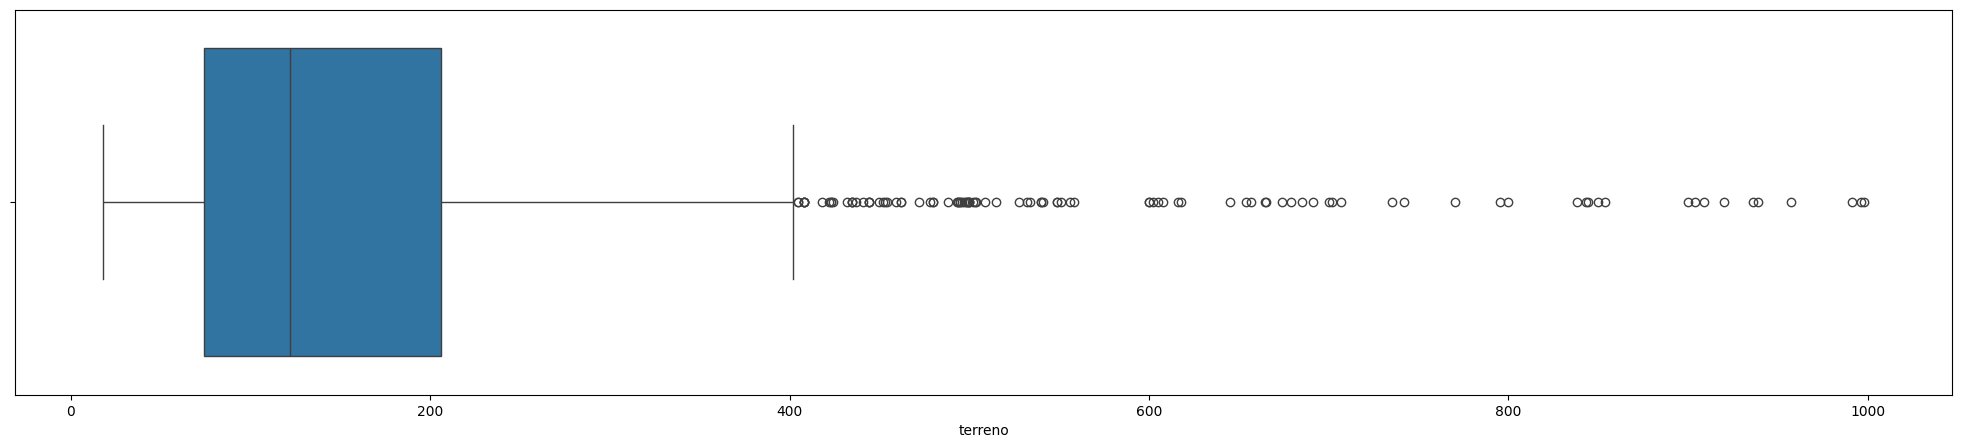

In [6]:
## Revisamos un poco las distribuciones que habiamos notado con outliers
plt.figure(figsize=(25,5))
sbn.boxplot(df['terreno'],legend=True, orient='h')
print(f'Datos totales {df.shape[0]}')
print(f'Media {df["terreno"].mean()} Mediana {df["terreno"].median()} Desviacion std {df["terreno"].std()}')
print('Quaniles:')
print(df["terreno"].quantile([.25, .5, .75, .97]))
print(f'Inmuebles por debajo de 1000m2 {df[df["terreno"]<1000].shape[0]} {df[df["terreno"]<1000].shape[0]/df.shape[0]}%')
plt.figure(figsize=(25,5))
sbn.boxplot(df[df['terreno']<1000]['terreno'],legend=True, orient='h')

In [7]:
## Dado lo visto algunos valores parecen estar muy alejados de la mediana siendo muy atitpicos
## Aunque es muy probable que si existan 
## Por lo cual procedemos a ir depurando y nos quedaremos con un 97% de los datos con un maximo de 1000m2
## Pero dejaremos intacto el conjunto original para tambien entrenar despues sobre el
df_depurado =  df[df["terreno"]<1000]
df_depurado.shape

(1037, 19)

Datos totales 1068
Media 206.17893258426966 Mediana 140.0 Desviacion std 187.5823271080812
Quaniles:
0.25     79.00
0.50    140.00
0.75    270.00
0.97    659.99
Name: construccion, dtype: float64
Inmuebles por debajo de 1000m2 1064 0.9962546816479401%


<Axes: xlabel='construccion'>

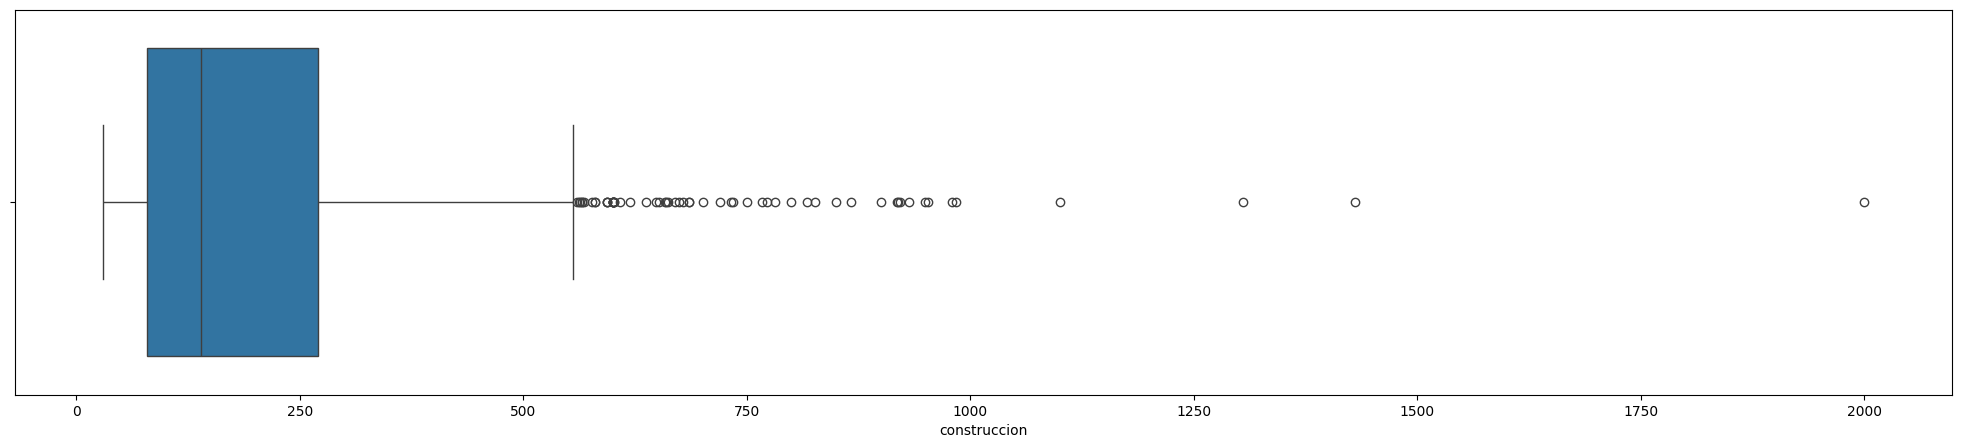

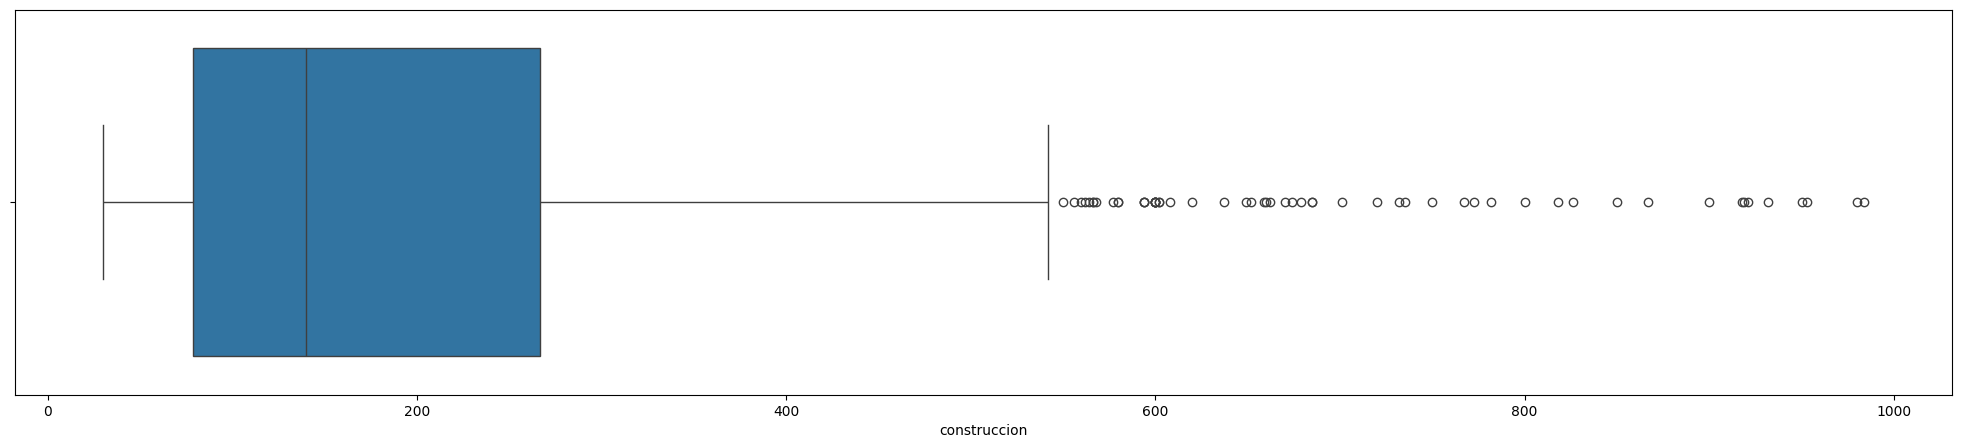

In [8]:
## Revisamos un poco las distribuciones  que habiamos notado con outliers
plt.figure(figsize=(25,5))
sbn.boxplot(df['construccion'],legend=True, orient='h')
print(f'Datos totales {df.shape[0]}')
print(f"Media {df['construccion'].mean()} Mediana {df['construccion'].median()} Desviacion std {df['construccion'].std()}")
print('Quaniles:')
print(df['construccion'].quantile([.25, .5, .75, .97]))
print(f"Inmuebles por debajo de 1000m2 {df[df['construccion']<1000].shape[0]} {df[df['construccion']<1000].shape[0]/df.shape[0]}%")
plt.figure(figsize=(25,5))
sbn.boxplot(df[df['construccion']<1000]['construccion'],legend=True, orient='h')

<Axes: xlabel='construccion'>

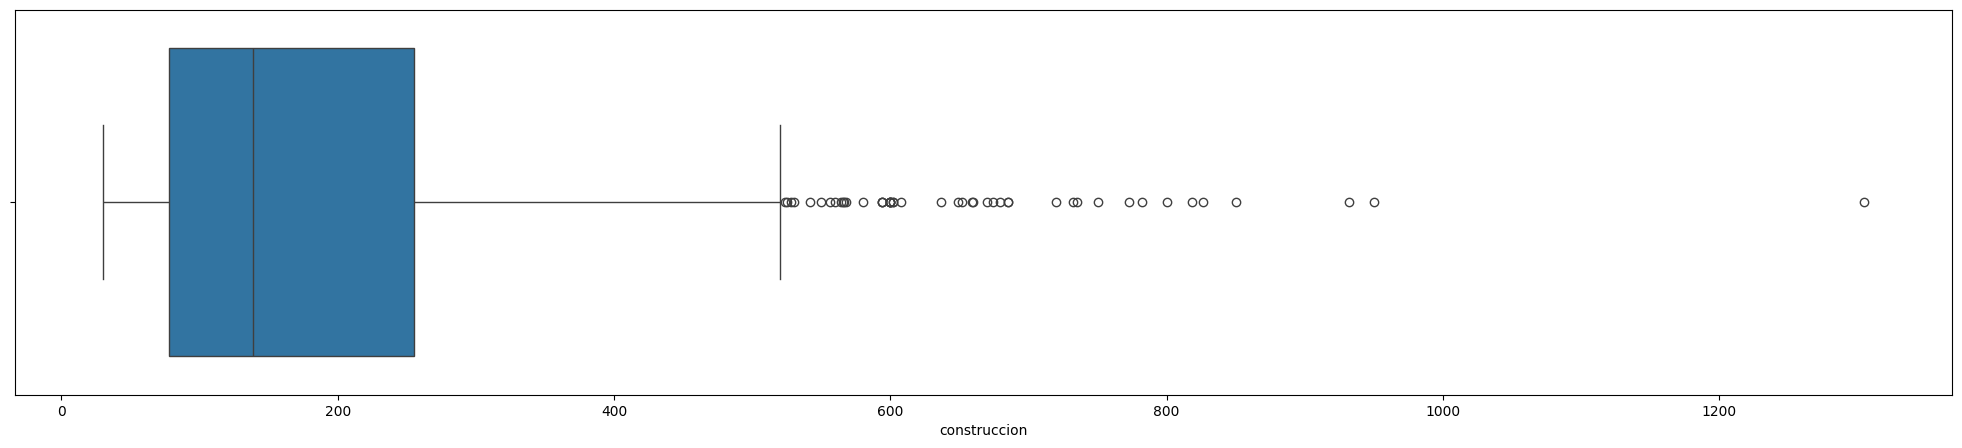

In [9]:
## revisamos la distribucion de construccion en los datos depurados
## Y vemos que al limitar el terreno y eliminar los valores atipicos tambien se vieron reducidos los valores atipicosabs 
## del campo de construccion
plt.figure(figsize=(25,5))
sbn.boxplot(df_depurado['construccion'],legend=True, orient='h')

Datos totales 1068
Media 2.331460674157303 Mediana 2.0 Desviacion std 6.900732946779144
Quaniles:
0.25    1.00
0.50    2.00
0.75    2.00
0.97    7.99
Name: estacionamientos, dtype: float64
Inmuebles por debajo de 1000m2 1067 0.9990636704119851%


<Axes: xlabel='estacionamientos'>

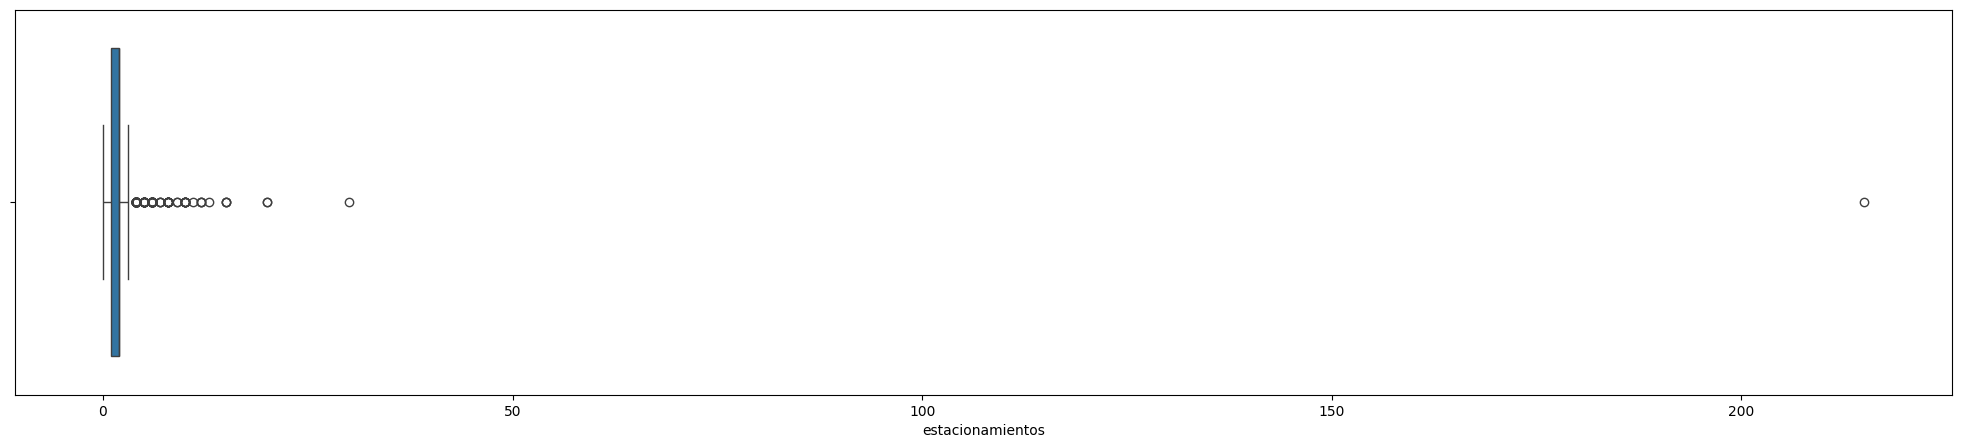

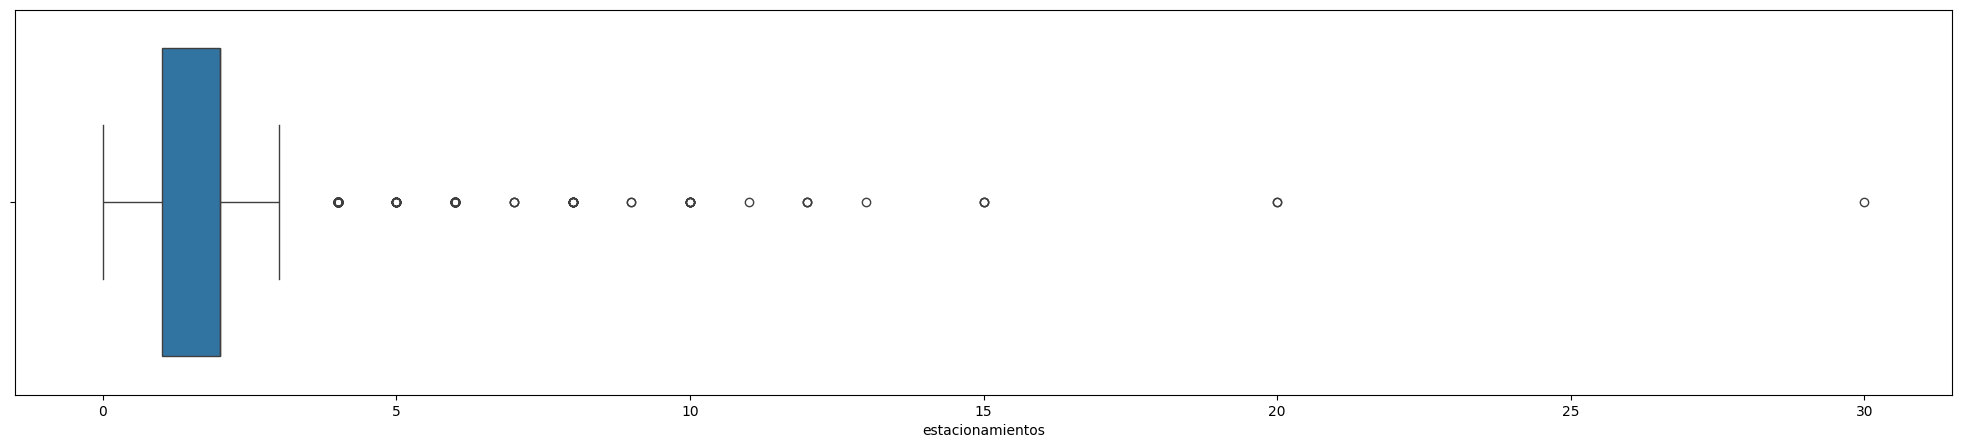

In [10]:
## Revisamos un poco las distribuciones  que habiamos notado con outliers
plt.figure(figsize=(25,5))
sbn.boxplot(df['estacionamientos'],legend=True, orient='h')
print(f'Datos totales {df.shape[0]}')
print(f"Media {df['estacionamientos'].mean()} Mediana {df['estacionamientos'].median()} Desviacion std {df['estacionamientos'].std()}")
print('Quaniles:')
print(df['estacionamientos'].quantile([.25, .5, .75, .97]))
print(f"Inmuebles por debajo de 1000m2 {df[df['estacionamientos']<35].shape[0]} {df[df['estacionamientos']<35].shape[0]/df.shape[0]}%")
plt.figure(figsize=(25,5))
sbn.boxplot(df[df['estacionamientos']<35]['estacionamientos'],legend=True, orient='h')

In [11]:
# Considerando que contar con mas de 215 estacionamientos suena poco creible
# Se decide quitar este outlier
df_depurado = df_depurado[df_depurado['estacionamientos']<35]
df_depurado.shape

(1036, 19)

In [12]:
## Revisamos denuevo nuestras metricas resumen ya depurado
df_depurado.describe()

terreno  construccion    recamaras        banos  estacionamientos  \
count  1036.000000   1036.000000  1036.000000  1036.000000       1036.000000   
mean    177.673842    191.751834     2.970077     2.359073          1.914093   
std     162.802983    157.175011     1.414921     1.223926          1.635167   
min      18.000000     30.000000     1.000000     1.000000          0.000000   
25%      73.850000     77.750000     2.000000     2.000000          1.000000   
50%     122.000000    138.450000     3.000000     2.000000          2.000000   
75%     206.000000    254.625000     3.000000     3.000000          2.000000   
max     998.000000   1305.000000    15.000000     9.000000         13.000000   

             precio  anio_construct            cp  grado_marginalidad  \
count  1.036000e+03     1036.000000   1036.000000         1036.000000   
mean   7.624219e+06     1997.089768   6592.722008            2.527992   
std    8.145698e+06       25.866559   4345.687964            1.339186   
min    6.800000e+05     1893.000000   1000.000000            1.000000   
25%    3.300000e+06     1983.000000   3230.000000            1.000000   
50%    5.249651e+06     2004.000000   5270.000000            2.000000   
75%    8.820000e+06     2019.000000   9700.000000            4.000000   
max    9.617089e+07     2025.000000  16770.000000            5.000000   

            pob_2010           lat          long  
count    1036.000000  1.036000e+03  1.036000e+03  
mean    13940.676641  1.943263e+01 -9.913318e+01  
std     14560.360740  7.108859e-15  1.421772e-14  
min       355.000000  1.943263e+01 -9.913318e+01  
25%      5116.000000  1.943263e+01 -9.913318e+01  
50%      9765.000000  1.943263e+01 -9.913318e+01  
75%     17464.000000  1.943263e+01 -9.913318e+01  
max    111728.000000  1.943263e+01 -9.913318e+01

In [13]:
df_depurado.columns

Index(['terreno', 'construccion', 'recamaras', 'banos', 'estacionamientos',
       'ubicacion', 'precio', 'anio_construct', 'cp', 'alcaldia', 'colonia',
       'grado_marginalidad', 'pob_2010', 'tipo_seccion', 'tipo_col',
       'precio_str', 'lat_long', 'lat', 'long'],
      dtype='object')

In [14]:
df_depurado.shape

(1036, 19)

In [15]:
str_cols = ['ubicacion','alcaldia','colonia','lat_long','lat','long','tipo_col','tipo_seccion','precio_str']
numeric_cols = list(set(df_depurado.columns)-set(str_cols))

In [16]:
# Separamos nuestras caracteristicas en numericas y no numericas
df_num_vars = df_depurado[numeric_cols]
df_str_vars = df_depurado[str_cols]
# Tambien guardamos nuestro targetabs
target = df_depurado['precio']
print(df_num_vars.shape, df_str_vars.shape, target.shape)

(1036, 10) (1036, 9) (1036,)


In [17]:
## obtenemos la matriz de correlacion
correlation = df_num_vars.corr()
correlation

estacionamientos  recamaras  grado_marginalidad     banos  \
estacionamientos            1.000000   0.415240           -0.108544  0.517511   
recamaras                   0.415240   1.000000            0.072594  0.645029   
grado_marginalidad         -0.108544   0.072594            1.000000 -0.111654   
banos                       0.517511   0.645029           -0.111654  1.000000   
pob_2010                   -0.098534   0.038049            0.561870 -0.062927   
construccion                0.630100   0.599724           -0.123130  0.710780   
precio                      0.543845   0.295922           -0.280096  0.514814   
cp                         -0.016239   0.123067            0.182509 -0.023302   
anio_construct             -0.090049  -0.341293           -0.011439 -0.126787   
terreno                     0.669296   0.462720           -0.097726  0.572930   

                    pob_2010  construccion    precio        cp  \
estacionamientos   -0.098534      0.630100  0.543845 -0.016239   
recamaras           0.038049      0.599724  0.295922  0.123067   
grado_marginalidad  0.561870     -0.123130 -0.280096  0.182509   
banos              -0.062927      0.710780  0.514814 -0.023302   
pob_2010            1.000000     -0.060542 -0.119015  0.256926   
construccion       -0.060542      1.000000  0.688455  0.037325   
precio             -0.119015      0.688455  1.000000 -0.041912   
cp                  0.256926      0.037325 -0.041912  1.000000   
anio_construct      0.008820     -0.288227 -0.096720 -0.118786   
terreno            -0.063626      0.779431  0.660661  0.078111   

                    anio_construct   terreno  
estacionamientos         -0.090049  0.669296  
recamaras                -0.341293  0.462720  
grado_marginalidad       -0.011439 -0.097726  
banos                    -0.126787  0.572930  
pob_2010                  0.008820 -0.063626  
construccion             -0.288227  0.779431  
precio                   -0.096720  0.660661  
cp                       -0.118786  0.078111  
anio_construct            1.000000 -0.246990  
terreno                  -0.246990  1.000000

<Axes: >

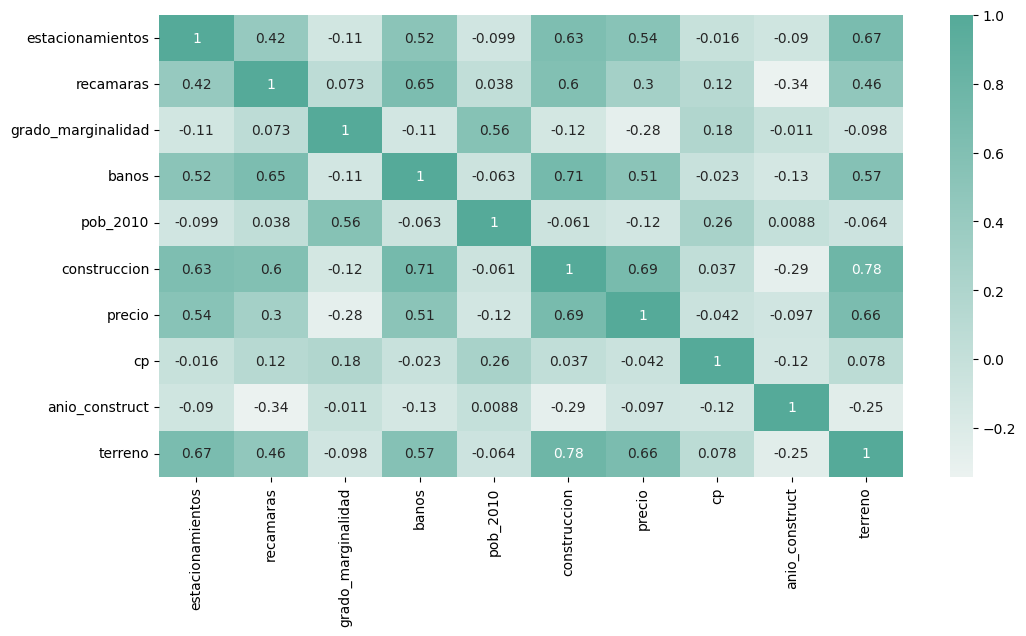

In [18]:
## obtenemos la matriz de correlacion pero ahora visual
plt.figure(figsize=(12,6))
sbn.heatmap(correlation,annot=True, cmap=sbn.color_palette("light:#5A9", as_cmap=True))

In [19]:
# Ahora trabajamos un poco con las variables categoricas
# Vemos que las observaciones no estan distribuidos de manera uniforme sobre 
# las caracteristicas categoricas
df_str_vars['alcaldia'].value_counts()

alcaldia
BENITO JUAREZ             191
ALVARO OBREGON            146
CUAUHTEMOC                102
COYOACAN                  101
MIGUEL HIDALGO             84
IZTAPALAPA                 70
TLALPAN                    65
AZCAPOTZALCO               63
GUSTAVO A. MADERO          61
CUAJIMALPA DE MORELOS      46
VENUSTIANO CARRANZA        38
LA MAGDALENA CONTRERAS     24
IZTACALCO                  20
XOCHIMILCO                 18
TLAHUAC                     6
MILPA ALTA                  1
Name: count, dtype: int64

In [20]:
# Modificamos los valores - por NO Registrado
df_str_vars['tipo_col'] = df_str_vars['tipo_col'].replace('-', 'NO REGISTRADO')
df_str_vars['tipo_col'].value_counts()

/tmp/ipykernel_2223/1804530895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_str_vars['tipo_col'] = df_str_vars['tipo_col'].replace('-', 'NO REGISTRADO')


tipo_col
COLONIA                  843
PUEBLO                    53
UNIDAD HABITACIONAL       47
FRACCIONAMIENTO           25
CONJUNTO HABITACIONAL     25
BARRIO                    19
AMPLIACION                 9
NO REGISTRADO              6
RESIDENCIAL                4
PARAJE                     2
LOCALIDAD                  1
CONDOMINIO                 1
EJIDO                      1
Name: count, dtype: int64

In [21]:
# Vemos que el tipo de seccion no nos aportara mucha informacion
# ya que la mayoria de datos se encuentra dentro de secciones urbanas
df_str_vars['tipo_seccion'].value_counts()

tipo_seccion
URBANO(A)    1029
MIXTO(A)        7
Name: count, dtype: int64

In [22]:
print(df_num_vars.shape, df_str_vars.shape, target.shape)

(1036, 10) (1036, 9) (1036,)


In [23]:
## Ahora pasamos a realizar algunas transformaciones a nuestros datos
## comenzamos estandarizando nuestros datos
from sklearn.preprocessing import StandardScaler
# Quitamos nuestra variable objetivo
# Y tambien nuestra variable que aunque es numerica nos da informacion categorica
# del grado de marginalidad y seguridad
cols_num_vars_std = list(set(df_num_vars.columns)-{'grado_marginalidad','precio'})
print(cols_num_vars_std)

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos solamente numericos
df_num_vars_std = scaler.fit_transform(df_num_vars[cols_num_vars_std])
df_num_vars_std = pd.DataFrame(data=df_num_vars_std,columns=cols_num_vars_std)
print(df_num_vars_std.shape, df_num_vars['grado_marginalidad'].shape)

# Comenzamos a vaciar nuestras caracteristicas en un solo df
df_num_vars_std.reset_index(drop=True, inplace=True)
df_num_vars.reset_index(drop=True, inplace=True)
df_complete = pd.concat([df_num_vars_std,df_num_vars['grado_marginalidad']],axis=1)

print(df_complete.shape)
# revisamos nuestros datos numericos estandarizados
df_complete.head(1)

['estacionamientos', 'recamaras', 'banos', 'pob_2010', 'construccion', 'cp', 'anio_construct', 'terreno']
(1036, 8) (1036,)
(1036, 9)


estacionamientos  recamaras     banos  pob_2010  construccion        cp  \
0         -0.559291  -0.685936 -1.110957  2.113765     -0.829106  0.029302   

   anio_construct  terreno  grado_marginalidad  
0        0.963494 -0.71393                 5.0

In [24]:
## Continuamos con la codificacion de nuestras variables categoricas
## Trataremos primeramente con la tecnica de one hot encoder
df_str_vars_dummies = pd.get_dummies(df_str_vars, columns=['alcaldia','tipo_col'])
cols_dummies = list(set(df_str_vars_dummies.columns)-{'ubicacion','colonia','lat_long','lat','long','tipo_seccion'
                                                  ,'precio_str','alcaldia','tipo_col'})
print(len(cols_dummies))
df_str_vars_dummies = df_str_vars_dummies[cols_dummies]
# convertimos todo a enteros
for i in cols_dummies:
    df_str_vars_dummies[i] = df_str_vars_dummies[i].apply(int)
df_str_vars_dummies.head(1)

29


alcaldia_IZTAPALAPA  tipo_col_RESIDENCIAL  alcaldia_IZTACALCO  \
0                    0                     0                   0   

   alcaldia_CUAUHTEMOC  alcaldia_AZCAPOTZALCO  tipo_col_FRACCIONAMIENTO  \
0                    1                      0                         0   

   alcaldia_GUSTAVO A. MADERO  tipo_col_EJIDO  tipo_col_CONDOMINIO  \
0                           0               0                    0   

   tipo_col_COLONIA  ...  tipo_col_UNIDAD HABITACIONAL  \
0                 1  ...                             0   

   alcaldia_CUAJIMALPA DE MORELOS  alcaldia_TLALPAN  alcaldia_COYOACAN  \
0                               0                 0                  0   

   tipo_col_PUEBLO  alcaldia_MIGUEL HIDALGO  tipo_col_AMPLIACION  \
0                0                        0                    0   

   tipo_col_BARRIO  alcaldia_BENITO JUAREZ  alcaldia_XOCHIMILCO  
0                0                       0                    0  

[1 rows x 29 columns]

In [25]:
# Vaciamos nuestras variables dummies en nuestro dataframe final
df_complete.reset_index(drop=True, inplace=True)
df_str_vars_dummies.reset_index(drop=True, inplace=True)
df_complete = pd.concat([df_complete,df_str_vars_dummies],axis=1)
df_complete.head(1)

estacionamientos  recamaras     banos  pob_2010  construccion        cp  \
0         -0.559291  -0.685936 -1.110957  2.113765     -0.829106  0.029302   

   anio_construct  terreno  grado_marginalidad  alcaldia_IZTAPALAPA  ...  \
0        0.963494 -0.71393                 5.0                    0  ...   

   tipo_col_UNIDAD HABITACIONAL  alcaldia_CUAJIMALPA DE MORELOS  \
0                             0                               0   

   alcaldia_TLALPAN  alcaldia_COYOACAN  tipo_col_PUEBLO  \
0                 0                  0                0   

   alcaldia_MIGUEL HIDALGO  tipo_col_AMPLIACION  tipo_col_BARRIO  \
0                        0                    0                0   

   alcaldia_BENITO JUAREZ  alcaldia_XOCHIMILCO  
0                       0                    0  

[1 rows x 38 columns]

In [26]:
# Y terminamos con un total de 42 caracteristicas de las cuales buscaremos encontrar cuales nos aporta mas a nuestros modelos
df_complete.shape

(1036, 38)

<Axes: >

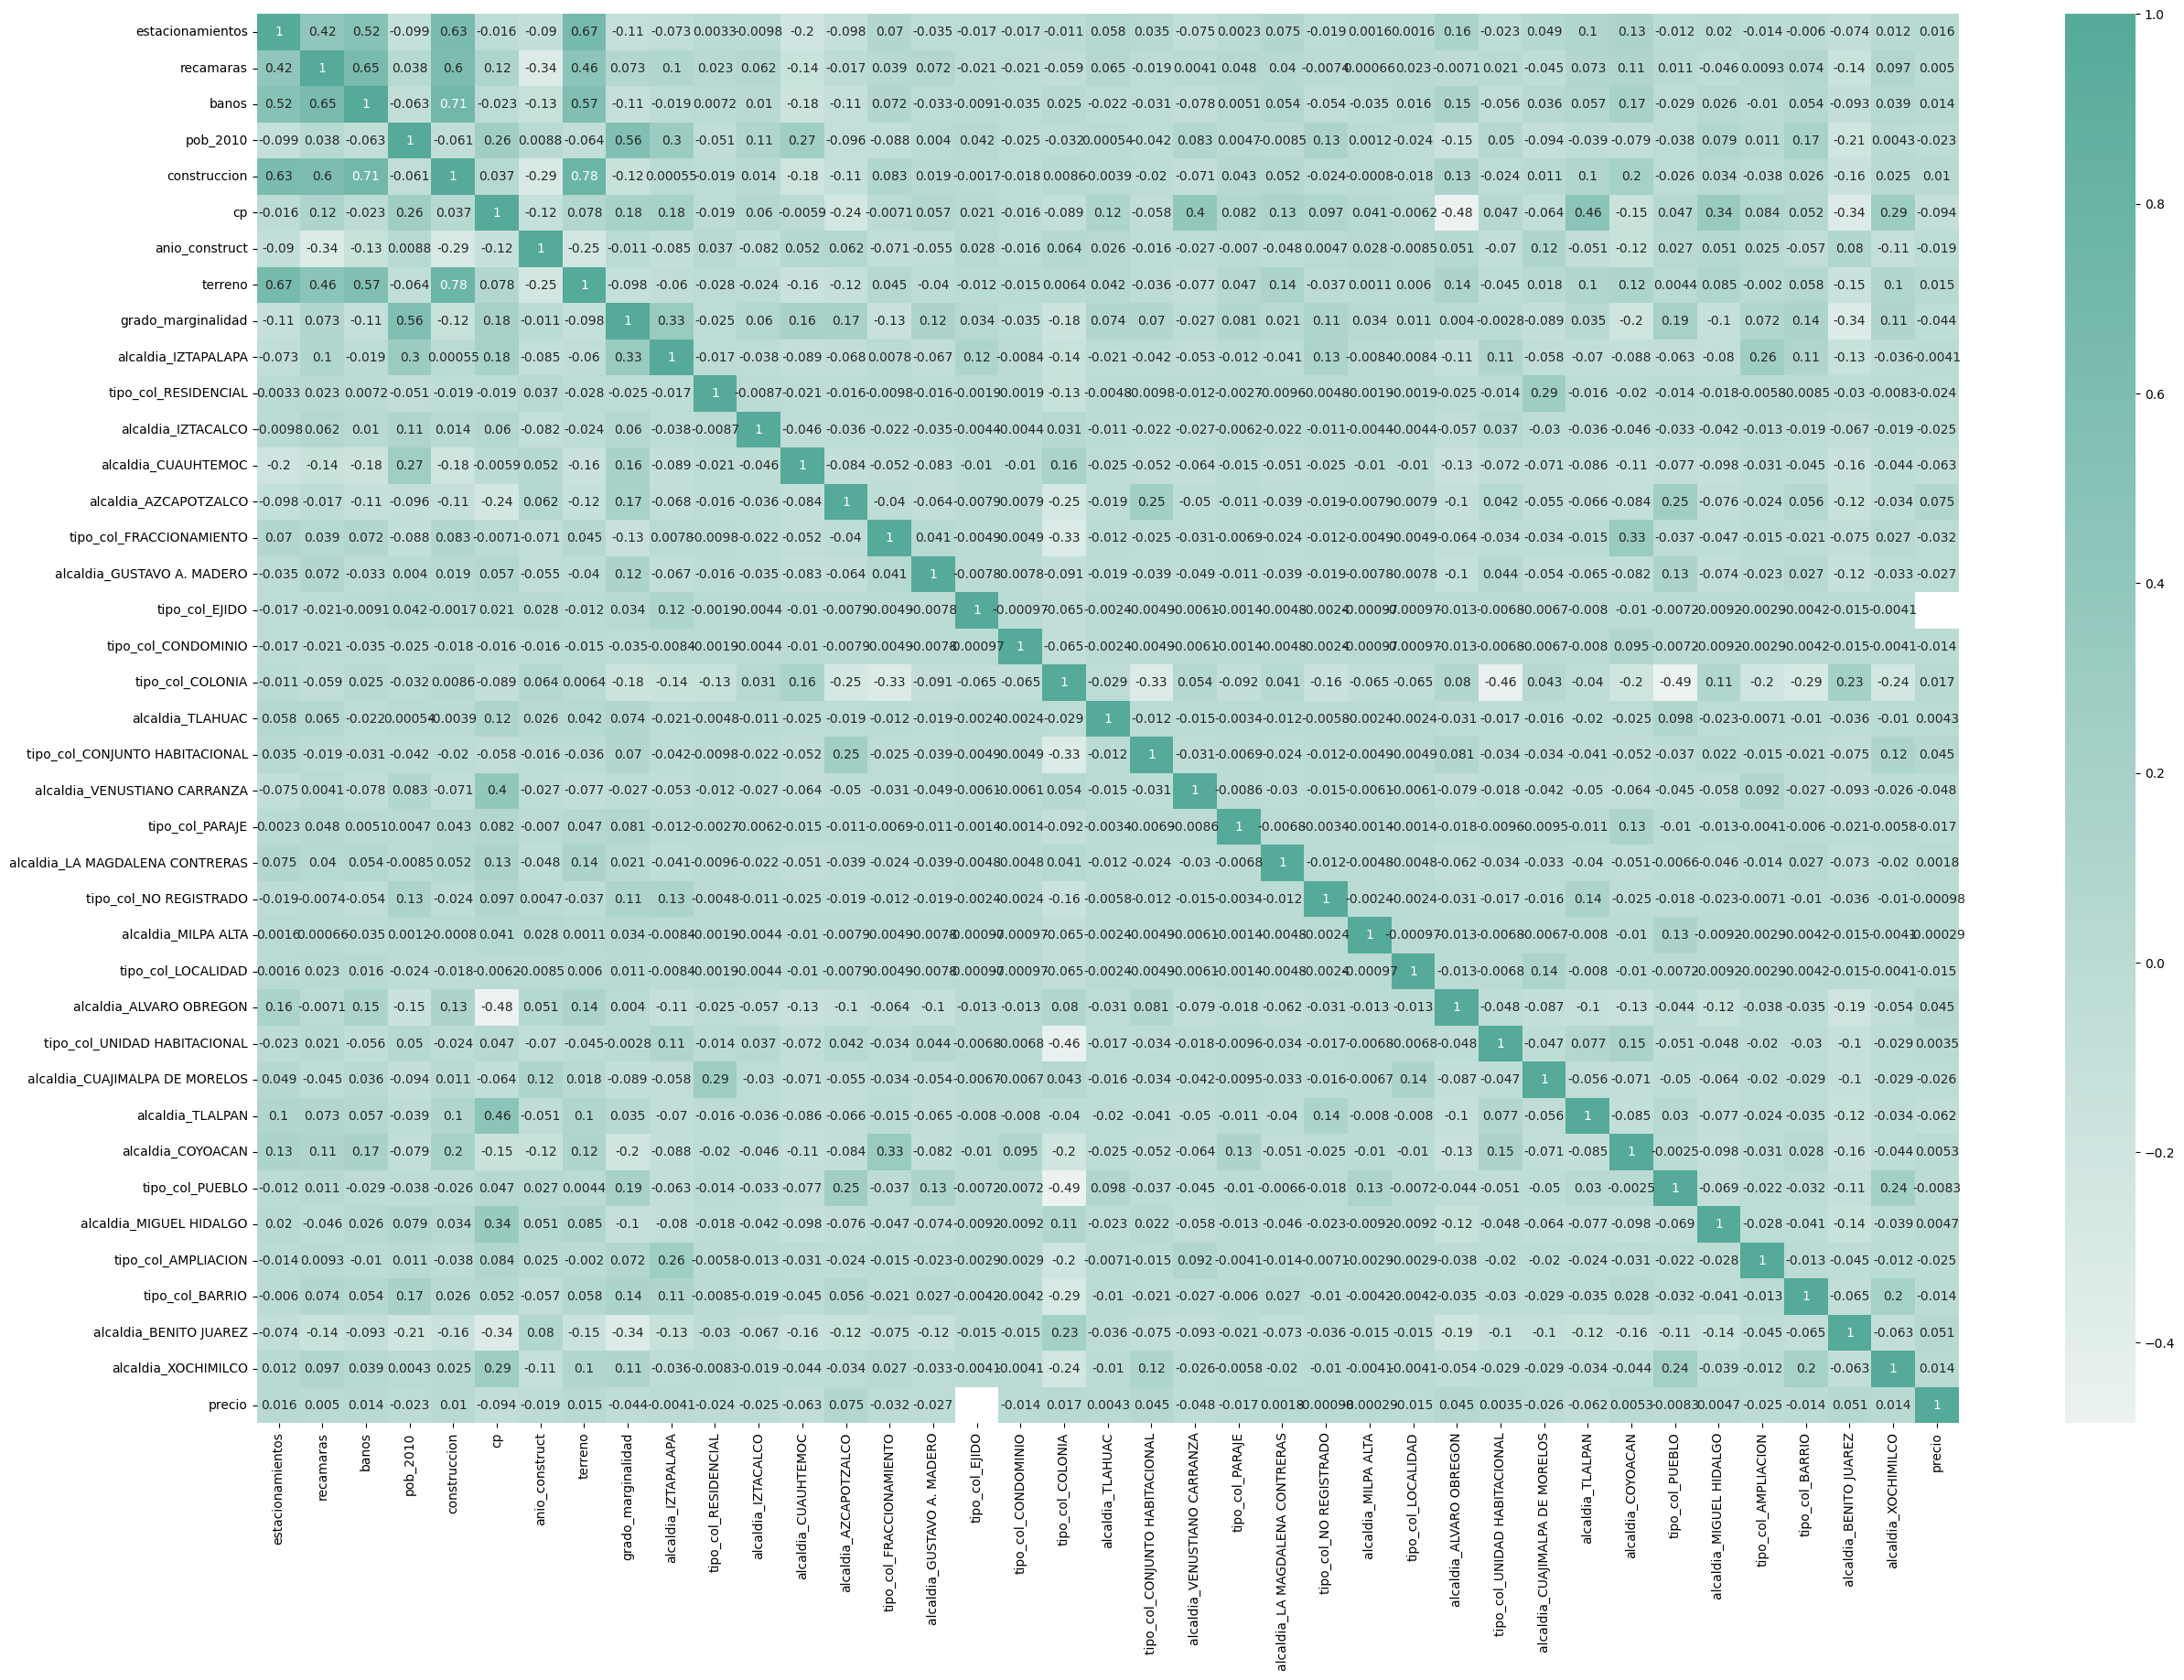

In [27]:
correlation_complete = pd.concat([df_complete,target],axis=1).corr()
## obtenemos la matriz de correlacion pero ahora visual de todas las caracteristicas
plt.figure(figsize=(30,20))
sbn.heatmap(correlation_complete,annot=True, cmap=sbn.color_palette("light:#5A9", as_cmap=True))

<Axes: >

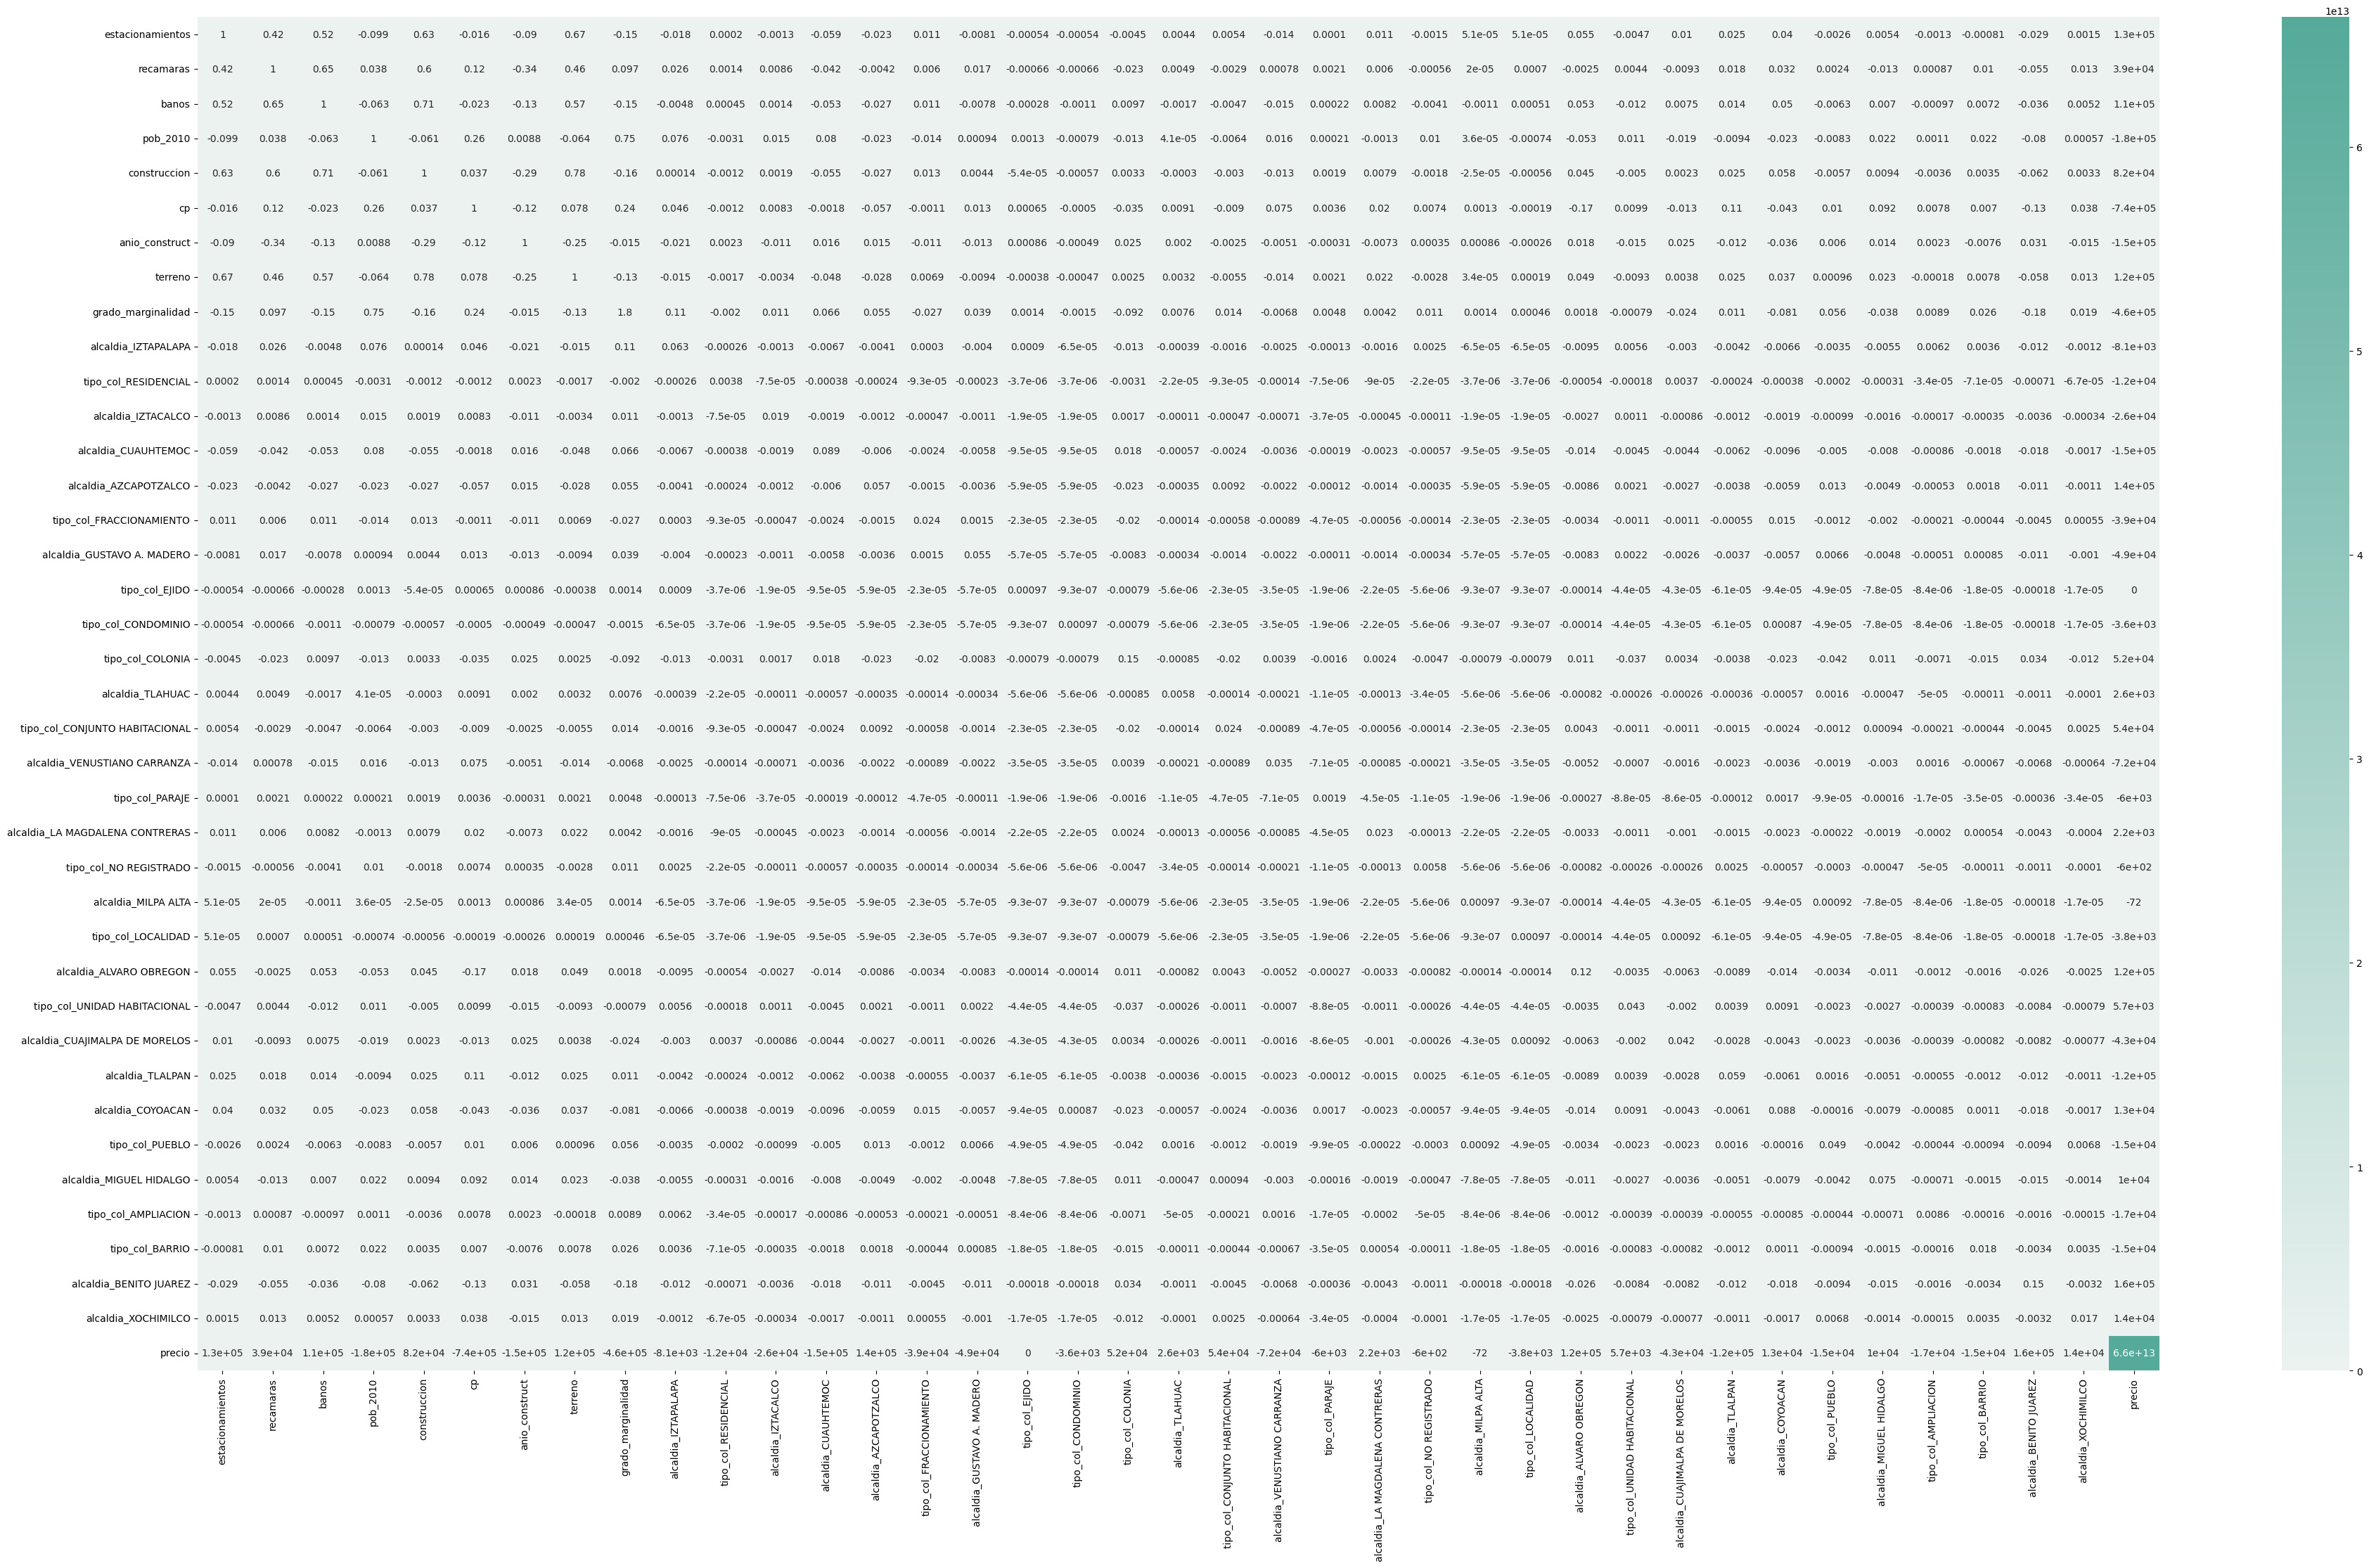

In [28]:
cov_complete = pd.concat([df_complete,target],axis=1).cov()
## obtenemos la matriz de correlacion pero ahora visual de todas las caracteristicas
plt.figure(figsize=(45,25))
sbn.heatmap(cov_complete,annot=True, cmap=sbn.color_palette("light:#5A9", as_cmap=True))

In [29]:
## comenzaremos ejecutando un algoritmo desde statsmodels sobre todas nuestras variables elegidas
# para ver su significancia mediante su p_value y asi ir descartando variables manualmente
import statsmodels.api as sm
## Creamos nuestro modelo de regresion lineal por minimos cuadrados
target.reset_index(drop=True, inplace=True)
modelo = sm.OLS(target, df_complete)
results = modelo.fit()
## Mostramos el resumen del entrenamiento del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     47.52
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          4.09e-189
Time:                        11:30:53   Log-Likelihood:                -17439.
No. Observations:                1036   AIC:                         3.495e+04
Df Residuals:                     999   BIC:                         3.513e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
estacionam

In [30]:
## Con esto podemos ver que hay varias variables que no serian significativas al tomar 
# como aceptable un p-value de maximo 0.05
print(f'Variables no significativas: {results.pvalues[results.pvalues>0.05].shape}')
descartadas1 = set(results.pvalues[results.pvalues>0.05].index)
descartadas1

Variables no significativas: (12,)


{'alcaldia_ALVARO OBREGON',
 'alcaldia_AZCAPOTZALCO',
 'alcaldia_BENITO JUAREZ',
 'alcaldia_COYOACAN',
 'alcaldia_MILPA ALTA',
 'anio_construct',
 'pob_2010',
 'tipo_col_CONDOMINIO',
 'tipo_col_EJIDO',
 'tipo_col_LOCALIDAD',
 'tipo_col_PARAJE',
 'tipo_col_RESIDENCIAL'}

In [31]:
# Pero ahora buscaremos extraer caracteristicas significativas con otra tecnica la de 
# eliminacion recursiva de caracteristicas y utilizaremos el modemo de svm support vector regressor
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=26, step=1)
selector = selector.fit(df_complete, target)
print(f'Variables {len(df_complete.columns)}:\n{df_complete.columns}')
print(f'Mascara {len(selector.support_)}:\n{selector.support_}')
print(f'Indice {len(selector.ranking_)}:\n{selector.ranking_}')
print(f'Caracteristicas que devuelve la tecnica de eliminacion recursiva:')
cols_rfe = [ i[0] for i in zip(df_complete.columns,selector.support_) if i[1]]
cols_no_rfe = set(df_complete.columns)-set(cols_rfe)
descartadas2 = set(cols_no_rfe)
print(f'Columnas descartadas:\n{cols_no_rfe}')
print(f'Columnas no descartadas:\n{cols_rfe}')

Variables 38:
Index(['estacionamientos', 'recamaras', 'banos', 'pob_2010', 'construccion',
       'cp', 'anio_construct', 'terreno', 'grado_marginalidad',
       'alcaldia_IZTAPALAPA', 'tipo_col_RESIDENCIAL', 'alcaldia_IZTACALCO',
       'alcaldia_CUAUHTEMOC', 'alcaldia_AZCAPOTZALCO',
       'tipo_col_FRACCIONAMIENTO', 'alcaldia_GUSTAVO A. MADERO',
       'tipo_col_EJIDO', 'tipo_col_CONDOMINIO', 'tipo_col_COLONIA',
       'alcaldia_TLAHUAC', 'tipo_col_CONJUNTO HABITACIONAL',
       'alcaldia_VENUSTIANO CARRANZA', 'tipo_col_PARAJE',
       'alcaldia_LA MAGDALENA CONTRERAS', 'tipo_col_NO REGISTRADO',
       'alcaldia_MILPA ALTA', 'tipo_col_LOCALIDAD', 'alcaldia_ALVARO OBREGON',
       'tipo_col_UNIDAD HABITACIONAL', 'alcaldia_CUAJIMALPA DE MORELOS',
       'alcaldia_TLALPAN', 'alcaldia_COYOACAN', 'tipo_col_PUEBLO',
       'alcaldia_MIGUEL HIDALGO', 'tipo_col_AMPLIACION', 'tipo_col_BARRIO',
       'alcaldia_BENITO JUAREZ', 'alcaldia_XOCHIMILCO'],
      dtype='object')
Mascara 38:
[ True  

In [32]:
# Pero ahora buscaremos extraer caracteristicas significativas con otra tecnica la de 
# eliminacion recursiva de caracteristicas y utilizaremos el modelo de linnear regresion normal
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=26, step=1)
selector = selector.fit(df_complete, target)
print(f'Variables {len(df_complete.columns)}:\n{df_complete.columns}')
print(f'Mascara {len(selector.support_)}:\n{selector.support_}')
print(f'Indice {len(selector.ranking_)}:\n{selector.ranking_}')
print(f'Caracteristicas que devuelve la tecnica de eliminacion recursiva:')
cols_rfe = [ i[0] for i in zip(df_complete.columns,selector.support_) if i[1]]
cols_no_rfe = set(df_complete.columns)-set(cols_rfe)
descartadas3 = set(cols_no_rfe)
print(f'Columnas descartadas:\n{cols_no_rfe}')
print(f'Columnas no descartadas:\n{cols_rfe}')

Variables 38:
Index(['estacionamientos', 'recamaras', 'banos', 'pob_2010', 'construccion',
       'cp', 'anio_construct', 'terreno', 'grado_marginalidad',
       'alcaldia_IZTAPALAPA', 'tipo_col_RESIDENCIAL', 'alcaldia_IZTACALCO',
       'alcaldia_CUAUHTEMOC', 'alcaldia_AZCAPOTZALCO',
       'tipo_col_FRACCIONAMIENTO', 'alcaldia_GUSTAVO A. MADERO',
       'tipo_col_EJIDO', 'tipo_col_CONDOMINIO', 'tipo_col_COLONIA',
       'alcaldia_TLAHUAC', 'tipo_col_CONJUNTO HABITACIONAL',
       'alcaldia_VENUSTIANO CARRANZA', 'tipo_col_PARAJE',
       'alcaldia_LA MAGDALENA CONTRERAS', 'tipo_col_NO REGISTRADO',
       'alcaldia_MILPA ALTA', 'tipo_col_LOCALIDAD', 'alcaldia_ALVARO OBREGON',
       'tipo_col_UNIDAD HABITACIONAL', 'alcaldia_CUAJIMALPA DE MORELOS',
       'alcaldia_TLALPAN', 'alcaldia_COYOACAN', 'tipo_col_PUEBLO',
       'alcaldia_MIGUEL HIDALGO', 'tipo_col_AMPLIACION', 'tipo_col_BARRIO',
       'alcaldia_BENITO JUAREZ', 'alcaldia_XOCHIMILCO'],
      dtype='object')
Mascara 38:
[ True  

In [33]:
# Por ultimo checamos las variables mediante el uso de randomForest con su feature importance
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(n_estimators=100, max_depth=7)
estimator.fit(df_complete, target)
# Obtener la importancia de las características
importancia_caracteristicas = estimator.feature_importances_
# Crear un DataFrame para visualizar la importancia
importancia_df = pd.DataFrame(
    data= list(zip(estimator.feature_names_in_, estimator.feature_importances_)),
    columns=['Columna','Importancia']
)
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

print(importancia_df)
descartadas4 = set(importancia_df.iloc[-12:,0].to_list())
descartadas4

                            Columna   Importancia
4                      construccion  3.837672e-01
7                           terreno  3.095146e-01
33          alcaldia_MIGUEL HIDALGO  7.289615e-02
6                    anio_construct  5.779511e-02
5                                cp  4.326364e-02
8                grado_marginalidad  3.975703e-02
3                          pob_2010  3.076095e-02
15       alcaldia_GUSTAVO A. MADERO  1.661667e-02
0                  estacionamientos  1.069759e-02
1                         recamaras  1.045968e-02
35                  tipo_col_BARRIO  6.432811e-03
2                             banos  5.703768e-03
29   alcaldia_CUAJIMALPA DE MORELOS  3.767176e-03
12              alcaldia_CUAUHTEMOC  2.418829e-03
18                 tipo_col_COLONIA  2.329203e-03
9               alcaldia_IZTAPALAPA  1.332645e-03
14         tipo_col_FRACCIONAMIENTO  5.108686e-04
31                alcaldia_COYOACAN  4.142986e-04
27          alcaldia_ALVARO OBREGON  3.874286e-04


{'alcaldia_IZTACALCO',
 'alcaldia_MILPA ALTA',
 'alcaldia_TLAHUAC',
 'alcaldia_VENUSTIANO CARRANZA',
 'alcaldia_XOCHIMILCO',
 'tipo_col_AMPLIACION',
 'tipo_col_CONDOMINIO',
 'tipo_col_EJIDO',
 'tipo_col_LOCALIDAD',
 'tipo_col_NO REGISTRADO',
 'tipo_col_PARAJE',
 'tipo_col_RESIDENCIAL'}

In [34]:
## Ahora trataremos de ver que otras variables son entre todas las tecnicas descartables 
## y tomaremos las que aparezcan en minimo la interseccion de 2 conjuntos, ademas agregaremos
## las variables anteriormente observadas con poca correlacion 
print('Interseccion  en mas de 2 conjuntos de las caracteristicas descartadas:')
cols_descart = descartadas1&descartadas2 | descartadas3&descartadas4 | descartadas2&descartadas3 | descartadas1&descartadas4 | {'cp','anio_construct'}
print(len(cols_descart))
print(cols_descart)

Interseccion  en mas de 2 conjuntos de las caracteristicas descartadas:
10
{'tipo_col_AMPLIACION', 'alcaldia_MILPA ALTA', 'tipo_col_LOCALIDAD', 'tipo_col_EJIDO', 'tipo_col_CONDOMINIO', 'tipo_col_RESIDENCIAL', 'cp', 'anio_construct', 'tipo_col_CONJUNTO HABITACIONAL', 'tipo_col_PARAJE'}


In [35]:
## Creamos nuestro dataframe con nuestras columnas seleccionadas
df_final = df_complete[list(set(df_complete.columns)-cols_descart)]
df_final.shape

(1036, 28)

In [36]:
# Ahora pasamos a la parte de modelado, probaremos distintos modelos para despues evaluarlos 
# y ver cual es el mejor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score,mean_squared_error

In [37]:
## Definimos una funcion para cuando estemos evaluando modelos ir graficando los resultados
def draw_predict(X, y, estimator, random_seed=777):
    np.random.seed(random_seed)
    rand_idx_low = np.random.randint(0,y.shape[0])
    rand_idx_high = np.random.randint(rand_idx_low,y.shape[0])
    # Hacer predicciones
    y_pred = estimator.predict(X.iloc[rand_idx_low:rand_idx_high])
    print(f'r2 :{r2_score(y_pred=y_pred, y_true=target.iloc[rand_idx_low:rand_idx_high])}')
    print(f'mse :{mean_squared_error(y_pred=y_pred, y_true=target.iloc[rand_idx_low:rand_idx_high])}')
    print(f'rmse :{root_mean_squared_error(y_pred=y_pred, y_true=target.iloc[rand_idx_low:rand_idx_high])}')
    print(f'mae :{mean_absolute_error(y_pred=y_pred, y_true=target.iloc[rand_idx_low:rand_idx_high])}')
    # Crear la figura y los ejes
    plt.figure(figsize=(10, 6))
    
    # Graficar los valores reales versus los predichos
    plt.scatter(target.iloc[rand_idx_low:rand_idx_high], y_pred, alpha=0.3)
    plt.plot([target.iloc[rand_idx_low:rand_idx_high].min(), target.iloc[rand_idx_low:rand_idx_high].max()],
             [target.iloc[rand_idx_low:rand_idx_high].min(), target.iloc[rand_idx_low:rand_idx_high].max()],
             'r--', lw=2)
    
    # Etiquetas y título del gráfico
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title('Valores Reales vs Valores Predichos')
    
    # Mostrar el gráfico
    plt.show()

def draw_pred_vs_true(y_pred, y_true):
    # Crear la figura y los ejes
    plt.figure(figsize=(10, 6))
    
    # Graficar los valores reales versus los predichos
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             'r--', lw=2)
    
    # Etiquetas y título del gráfico
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title('Valores Reales vs Valores Predichos')
    
    # Mostrar el gráfico
    plt.show()


Linear Regression R2 medio: -1.0354648854713176e+22, Desviación Estándar de R2: 2.0709297709426353e+22
r2 :0.6696878314712855
mse :20740356725820.77
rmse :4554158.1797101395
mae :2436980.0325366487


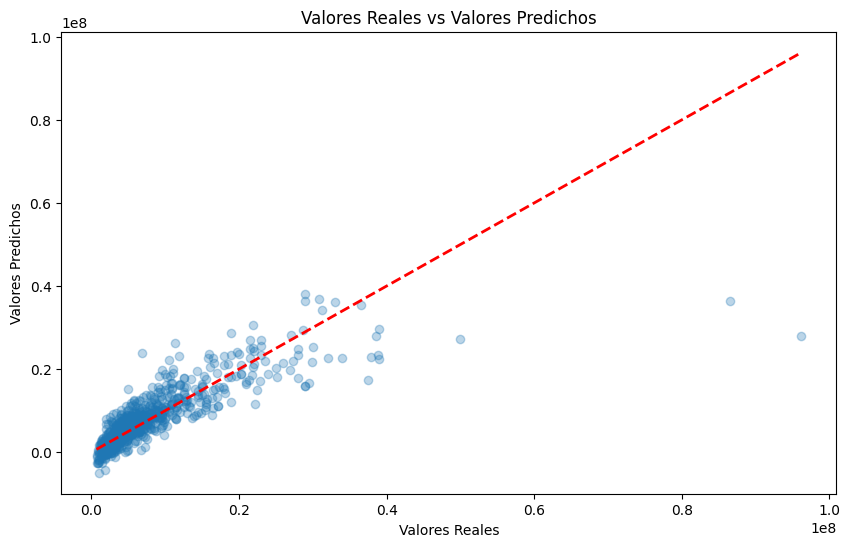

Ridge Regression R2 medio: 0.6329596093754631, Desviación Estándar de R2: 0.09466556970051104
r2 :0.6698020492954282
mse :20733184969394.96
rmse :4553370.72610994
mae :2437673.7329888237


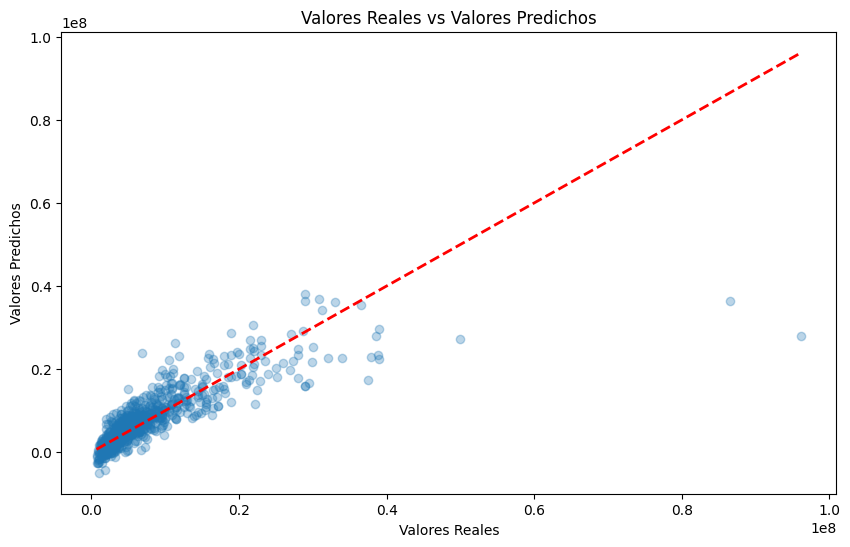

Lasso Regression R2 medio: 0.6317824326344882, Desviación Estándar de R2: 0.09393193441560992
r2 :0.6696911254193203
mse :20740149898268.57
rmse :4554135.4721031925
mae :2437552.667508433


/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.644e+15, tolerance: 6.175e+12
  model = cd_fast.enet_coordinate_descent(
/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+16, tolerance: 6.069e+12
  model = cd_fast.enet_coordinate_descent(
/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to 

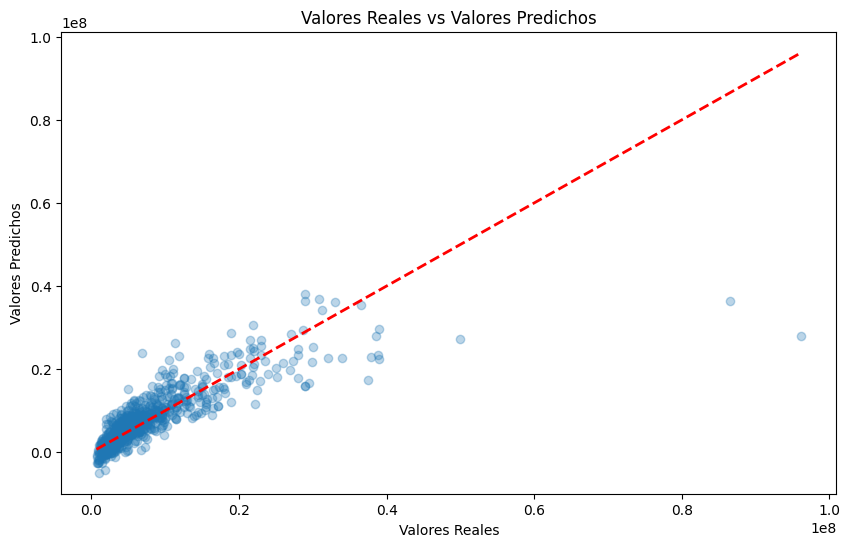

Elastic Net R2 medio: 0.6536354968375988, Desviación Estándar de R2: 0.11986763795811649
r2 :0.6658304568576818
mse :20982561927850.16
rmse :4580672.650151958
mae :2310576.9833431905


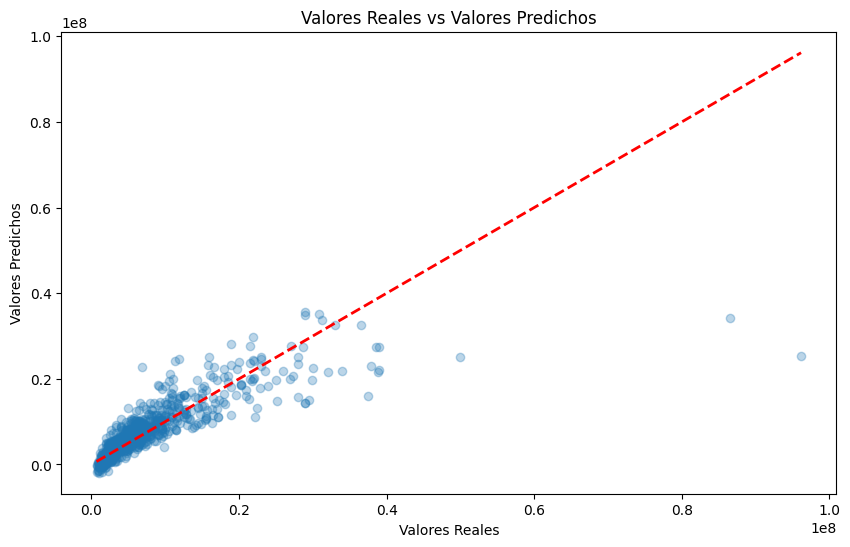

SGD Regressor R2 medio: 0.649883445092293, Desviación Estándar de R2: 0.1263299093426397
r2 :0.656223404063411
mse :21585790391774.125
rmse :4646051.053504914
mae :2309480.0679430077


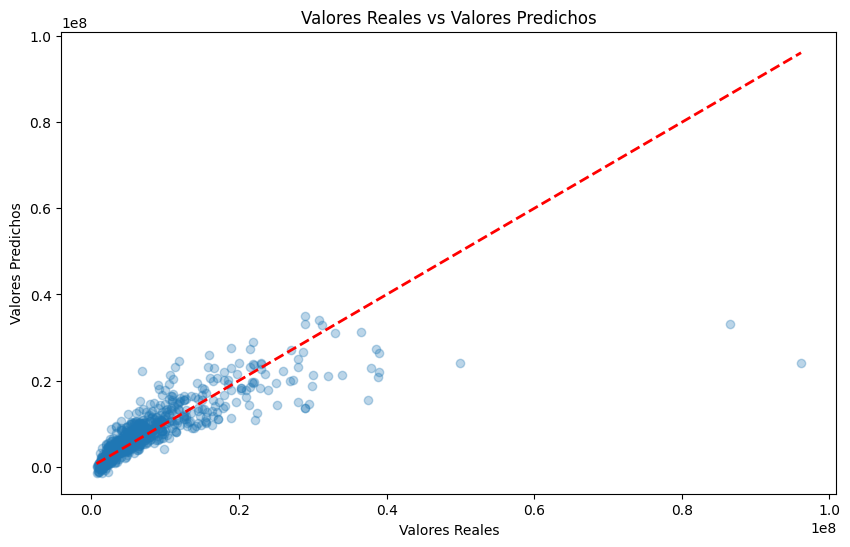

ADA BoostRegresor R2 medio: 0.43902458929849797, Desviación Estándar de R2: 0.22106517237321102
r2 :0.7564439463610837
mse :15292925651829.664
rmse :3910617.042338672
mae :2662367.6501622787


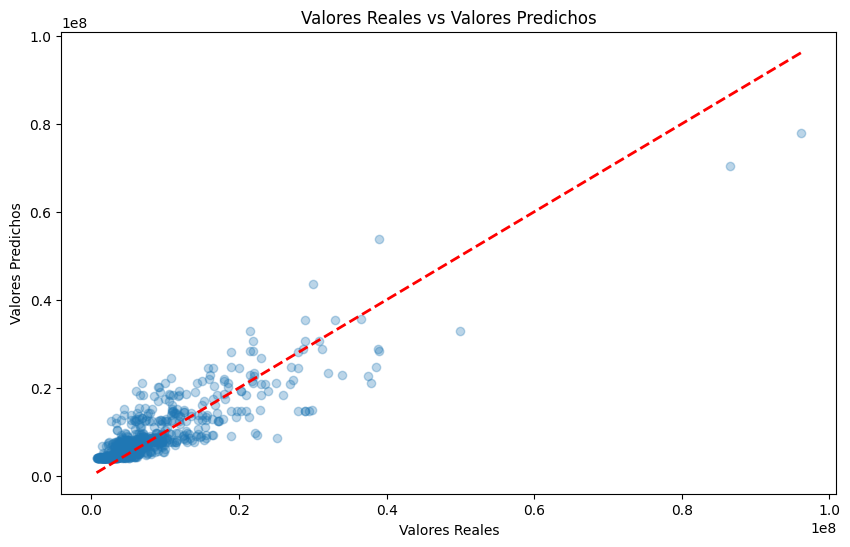

KNN Regression R2 medio: 0.6041034113684689, Desviación Estándar de R2: 0.09418042921636956
r2 :0.7356483418346067
mse :16598685164503.295
rmse :4074148.3974572276
mae :1995857.7658194564


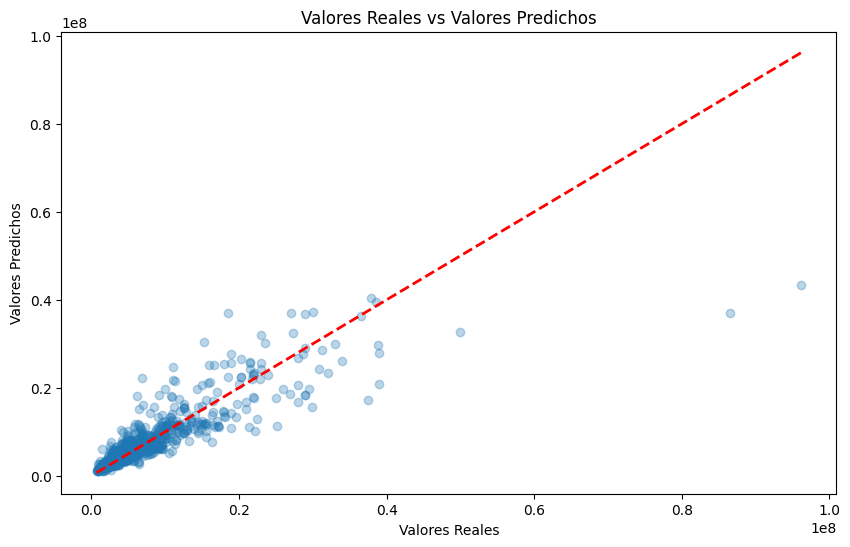

Random Forest R2 medio: 0.5841704468076407, Desviación Estándar de R2: 0.10594571376964063
r2 :0.8444529445184719
mse :9766825826331.854
rmse :3125192.1263070935
mae :1926305.8768646475


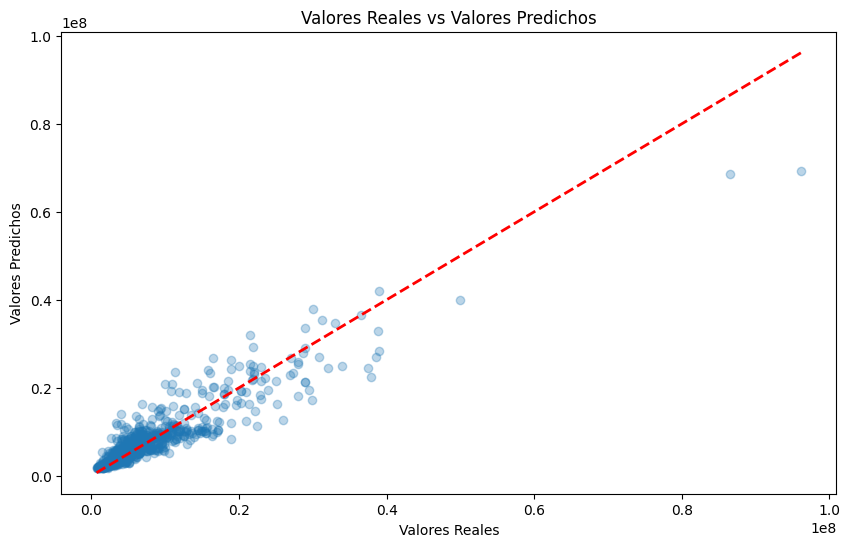

Gradient Boosting R2 medio: 0.6142716827595744, Desviación Estándar de R2: 0.1034584792158677
r2 :0.9633811777719961
mse :2299302018666.605
rmse :1516344.9537181852
mae :901802.5747030322


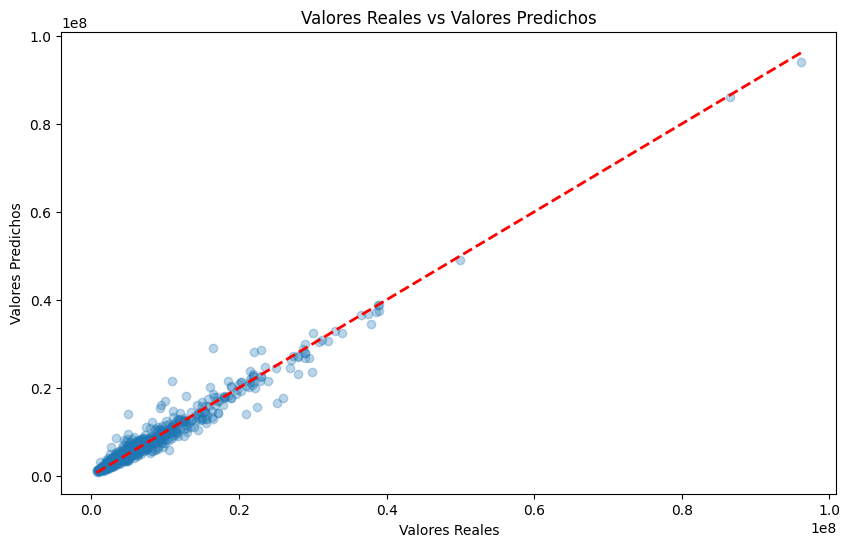

XGBoost R2 medio: 0.542471261928116, Desviación Estándar de R2: 0.1351413277678685
r2 :0.9600550780263112
mse :2508148382209.4243
rmse :1583713.478571621
mae :623516.4608128835


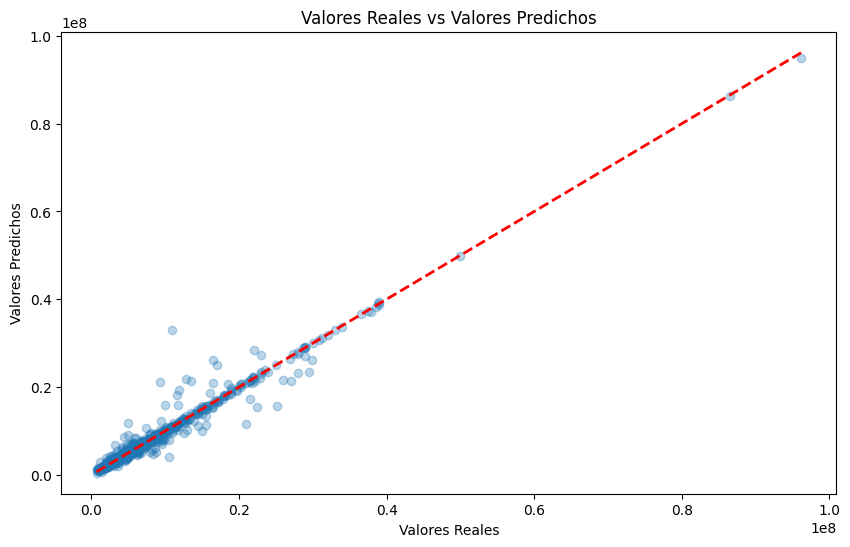

In [38]:
## Trabajaremos con cross validation sobre nuestras variables seleccionadas solo 
# Creamos un diccionario con todos los modelos que queremos evaluar
modelos = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=0.1),
    'SGD Regressor': SGDRegressor(alpha=0.1, learning_rate='adaptive'),
    'ADA BoostRegresor':AdaBoostRegressor(n_estimators=100,learning_rate=0.15),
    'KNN Regression': KNeighborsRegressor(n_neighbors=7),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=777),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=777),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, max_depth=5, random_state=777)
}

# Evaluar cada modelo usando Cross-Validation
resultados = {}
x_train,x_test,y_train,y_test = train_test_split(df_final, target, test_size=0.2, train_size=0.8)
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, df_final, target, cv=5, scoring='r2')
    resultados[nombre] = np.mean(scores), np.std(scores), modelo
    print(f"{nombre} R2 medio: {np.mean(scores)}, Desviación Estándar de R2: {np.std(scores)}")
    ## Entrenamos nuestro modelo a partir de un 80% de datos para obtener otras metricas
    modelo.fit(x_train,y_train)
    draw_predict(df_final,target,modelo)


Linear Regression R2 medio: 0.6344855663800288, Desviación Estándar de R2: 0.09712680188241664
r2 :0.6692136678432266
mse :20770129539932.207
rmse :4557425.758027464
mae :2332090.020729197


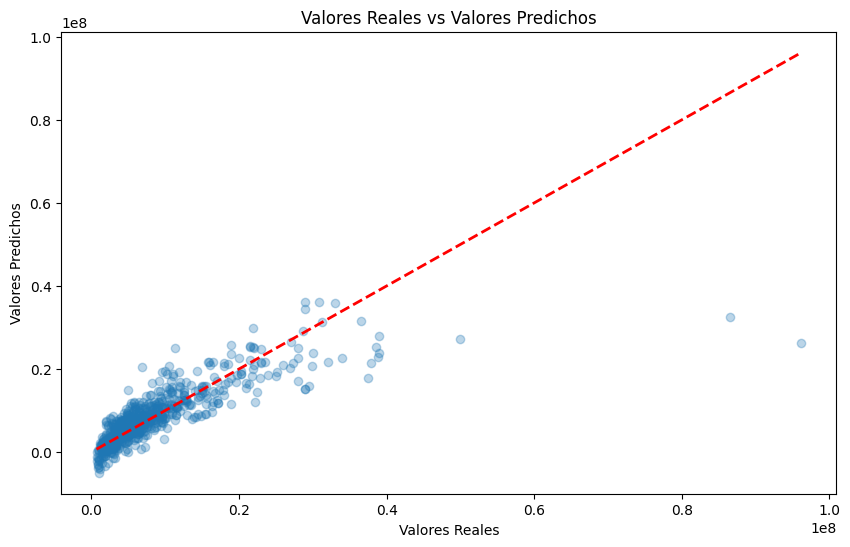

Ridge Regression R2 medio: 0.6354859722414468, Desviación Estándar de R2: 0.09740595585044828
r2 :0.6691410676462322
mse :20774688118536.004
rmse :4557925.857068761
mae :2327965.563556203


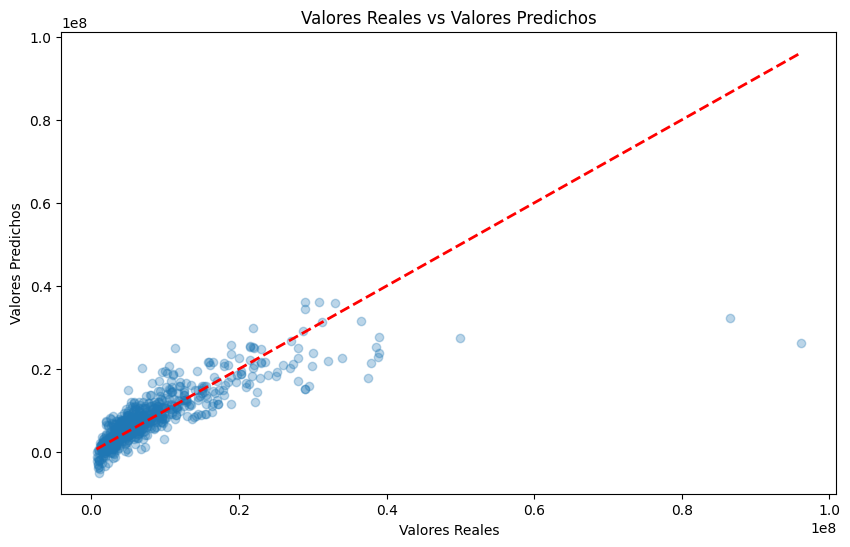

/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+16, tolerance: 6.175e+12
  model = cd_fast.enet_coordinate_descent(
/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+16, tolerance: 6.069e+12
  model = cd_fast.enet_coordinate_descent(
/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to 

Lasso Regression R2 medio: 0.6340401048662314, Desviación Estándar de R2: 0.0968570949220372
r2 :0.6692001004432446
mse :20770981439263.44
rmse :4557519.219845753
mae :2332407.6405493654


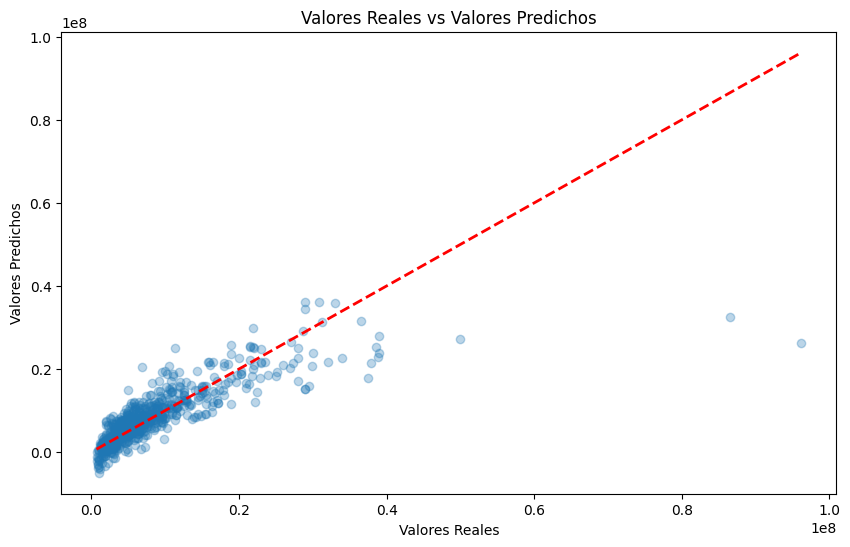

Elastic Net R2 medio: 0.6568841659279665, Desviación Estándar de R2: 0.12128843732555569
r2 :0.664337409033483
mse :21076310652338.65
rmse :4590894.319447862
mae :2205505.021331477


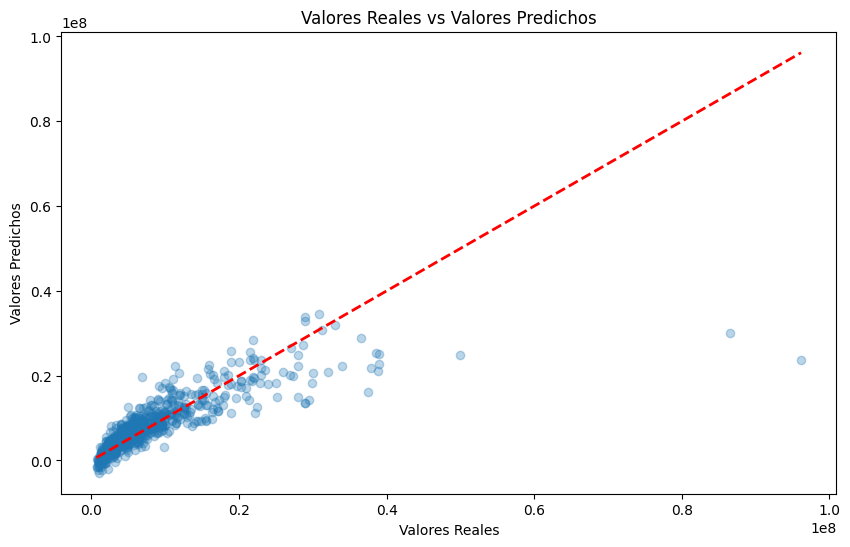

SGD Regressor R2 medio: 0.6535799896415656, Desviación Estándar de R2: 0.12768348482354963
r2 :0.652626753073806
mse :21811624713515.74
rmse :4670291.716104653
mae :2215236.5141323176


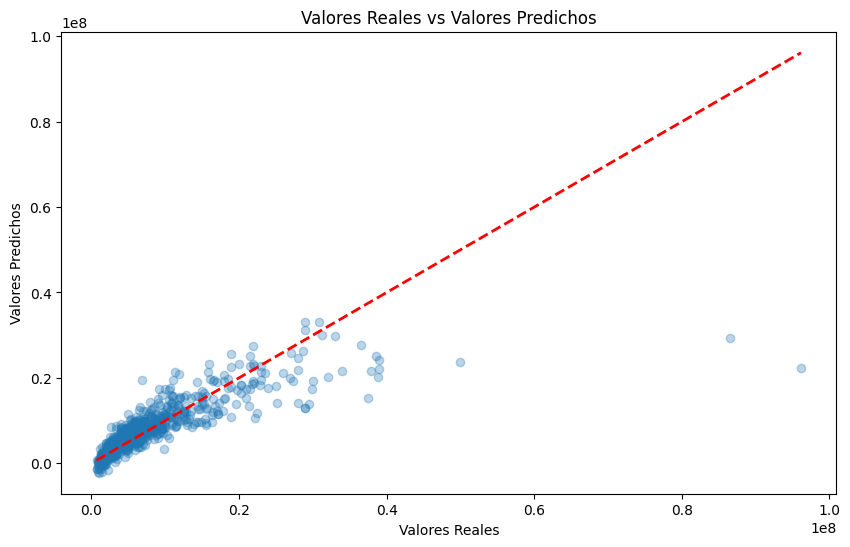

ADA BoostRegresor R2 medio: 0.4664364978684028, Desviación Estándar de R2: 0.19622990568675588
r2 :0.7384186534303274
mse :16424736832557.637
rmse :4052744.358155056
mae :2581229.098659482


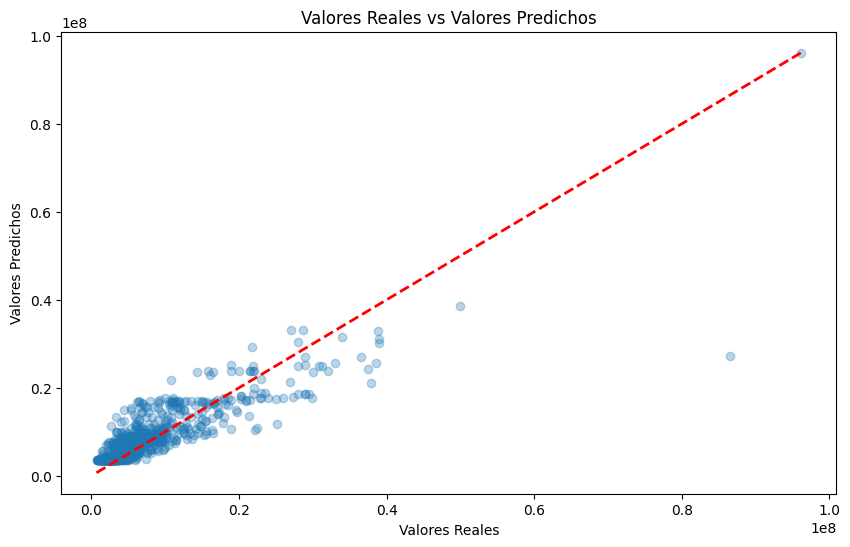

KNN Regression R2 medio: 0.5937183865710178, Desviación Estándar de R2: 0.12217324293499791
r2 :0.6931536963979127
mse :19266931112631.87
rmse :4389411.24897541
mae :1992038.6262927258


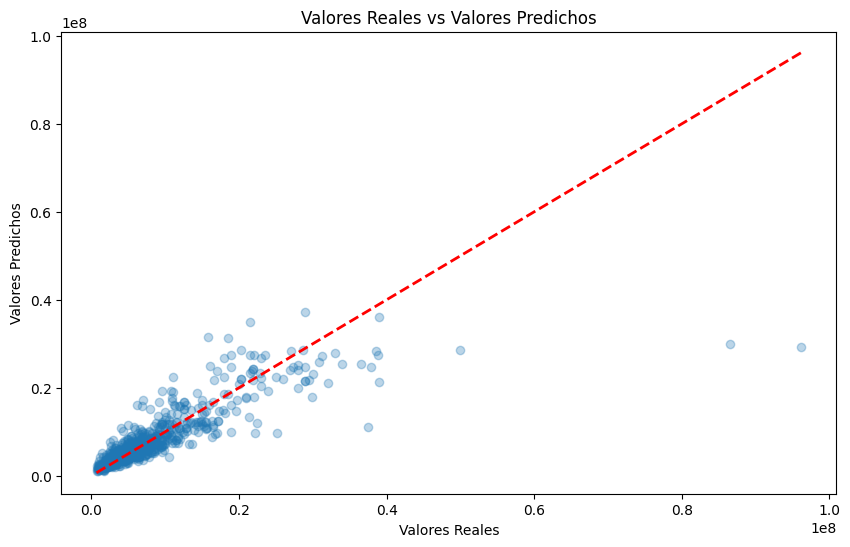

Random Forest R2 medio: 0.602014158654058, Desviación Estándar de R2: 0.1135642422032243
r2 :0.8241494947543277
mse :11041682858541.133
rmse :3322902.7759687966
mae :1722621.9575536174


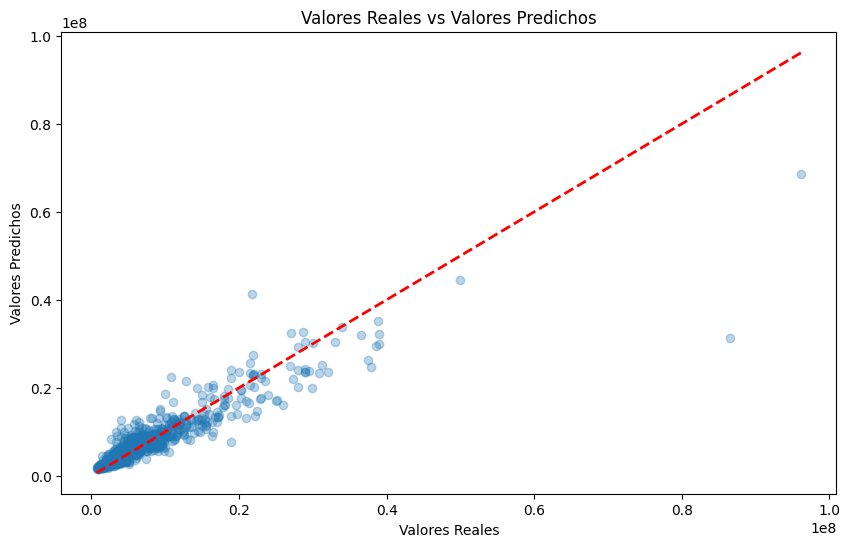

Gradient Boosting R2 medio: 0.6576975596718555, Desviación Estándar de R2: 0.10909461038873007
r2 :0.9039179835811502
mse :6033006002592.604
rmse :2456217.8247445
mae :843668.7946319518


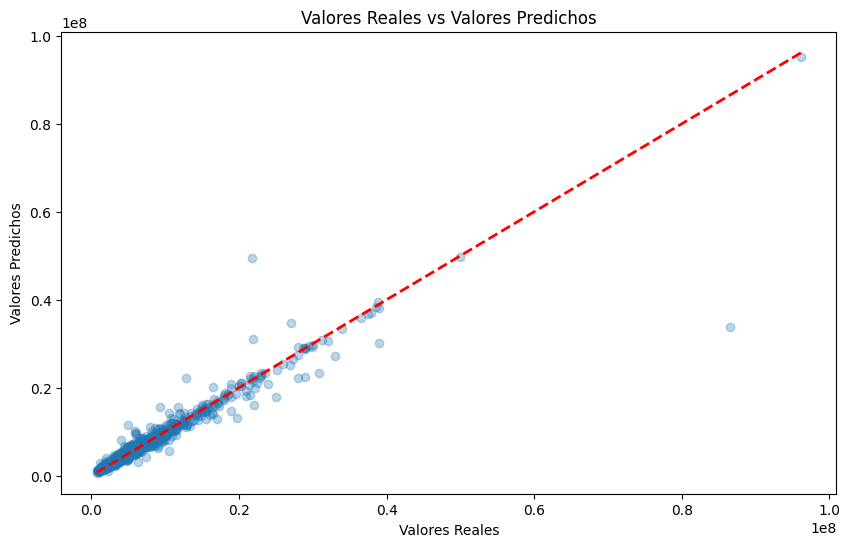

XGBoost R2 medio: 0.6017159892616059, Desviación Estándar de R2: 0.16148304478866232
r2 :0.9030406967501996
mse :6088090990547.557
rmse :2467405.7207009057
mae :581373.8177147239


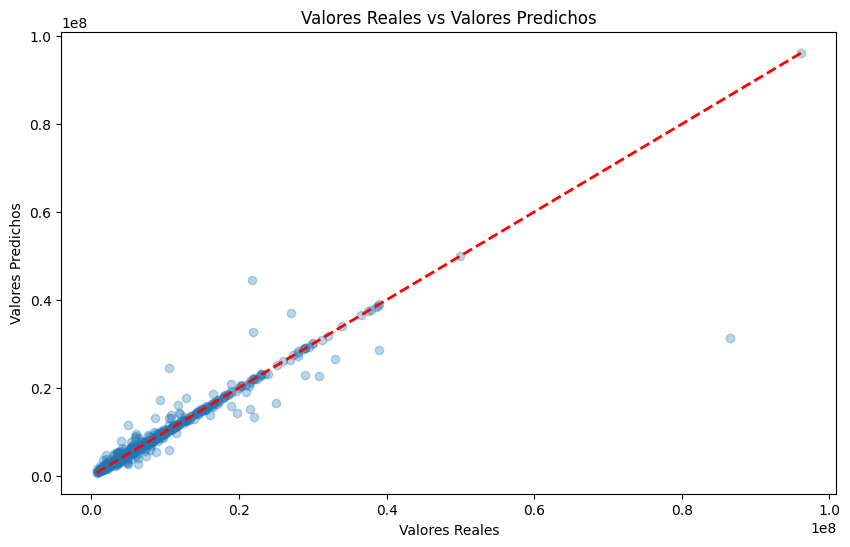

In [39]:
## Trabajaremos con cross validation sobre todo el conjunto con todas las caracteristicas 38
# Evaluar cada modelo usando Cross-Validation
resultados = {}
x_train,x_test,y_train,y_test = train_test_split(df_complete, target, test_size=0.2, train_size=0.8)
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, df_complete, target, cv=5, scoring='r2')
    resultados[nombre] = np.mean(scores), np.std(scores), modelo
    print(f"{nombre} R2 medio: {np.mean(scores)}, Desviación Estándar de R2: {np.std(scores)}")
    ## Entrenamos nuestro modelo a partir de un 80% de datos para obtener otras metricas
    modelo.fit(x_train,y_train)
    draw_predict(df_complete,target,modelo)


In [40]:
## Podemos observar que al utilizar todas las variables no hay diferencia muy notable, por lo cual
## la seleccion de caracteristicas tuvo buen resultado 
## Lo siguiente es que vemos un mejor rendimiento en el modelo de XGBoost donde el error absoluto medio es mas bajo
## y el rmse es similar al de Gradient Boosting por lo cual elegiremos XGBoost para buscar sus mejores resultados
from sklearn.model_selection import RandomizedSearchCV
# Instanciamos nuestro modelo de nuevo
modelo_rf = xgb.XGBRegressor(random_state=777)
# Definimos el espacio de hiperparámetros
param_distributions = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': np.arange(0.05, 0.45, 0.05),
    'max_depth': np.arange(5, 25, 1),
}
# Configuramos RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=modelo_rf, param_distributions=param_distributions, 
                                   n_iter=100, cv=5, scoring='neg_mean_absolute_error', random_state=777, n_jobs=-1)

# Ajustar RandomizedSearchCV
random_search.fit(df_final, target)

# Obtener los mejores hiperparámetros
print("Mejores Hiperparámetros:", random_search.best_params_)
print("Mejor Score:", random_search.best_score_)


Mejores Hiperparámetros: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.15000000000000002}
Mejor Score: -2228894.8599768328


In [41]:
## Creamos el modelo que nos definio como mejor
best_model =  xgb.XGBRegressor(n_estimators=100, learning_rate=0.15, max_depth=5,)
x_train,x_test,y_train,y_test = train_test_split(df_final, target, test_size=0.20, train_size=0.80, random_state=230)

In [42]:
# Entrenamos y verificamos metricas sobre los datos de entrenamiento
best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_train)
r2 = r2_score(y_pred=y_pred, y_true=y_train)
mse = mean_squared_error(y_pred=y_pred, y_true=y_train)
rmse = root_mean_squared_error(y_pred=y_pred, y_true=y_train)
mae = mean_absolute_error(y_pred=y_pred, y_true=y_train)
print(f'r2 :{r2}')
print(f'mse :{mse}')
print(f'rmse :{rmse}')
print(f'mae :{mae}')

r2 :0.9852896073030749
mse :883317780880.7238
rmse :939849.8714585877
mae :647996.3294836957


r2 :0.782756433756207
mse :19743368301125.28
rmse :4443351.021596795
mae :1870476.3572716345


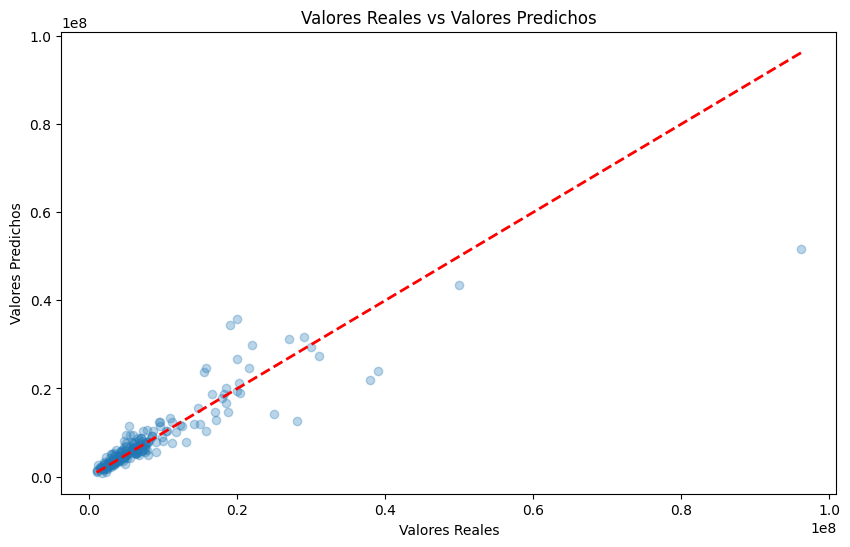

In [43]:
# Verificamos metricas sobre los datos de prueba
y_pred = best_model.predict(x_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
rmse = root_mean_squared_error(y_pred=y_pred, y_true=y_test)
mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
print(f'r2 :{r2}')
print(f'mse :{mse}')
print(f'rmse :{rmse}')
print(f'mae :{mae}')
draw_pred_vs_true(y_pred, y_test)

In [44]:
best_model.save_model('xgboost_fit_model.json')

In [45]:
##### Probamos ahora con elastic net
from sklearn.model_selection import GridSearchCV
# Instanciamos nuestro modelo de nuevo
modelo_rf = ElasticNet()
# Definimos el espacio de hiperparámetros
param_distributions = {
    'alpha': [1.0, 0.1, 0.01, 0.001],
    'l1_ratio': [0.5, 0.2, 0.7, 0.1, 0.8, 0.25, 0.15, 0.65, 0.35],
    'tol': [0.01, 0.001, 0.1, 0.0001, 0.00001],
}
# Configuramos RandomizedSearchCV
random_search = GridSearchCV(estimator=modelo_rf, param_grid=param_distributions,
                             cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Ajustar RandomizedSearchCV
random_search.fit(df_final, target)

# Obtener los mejores hiperparámetros
print("Mejores Hiperparámetros:", random_search.best_params_)
print("Mejor Score:", random_search.best_score_)

/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.118e+15, tolerance: 6.175e+12
  model = cd_fast.enet_coordinate_descent(
/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.580e+13, tolerance: 6.069e+12
  model = cd_fast.enet_coordinate_descent(
/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to 

Mejores Hiperparámetros: {'alpha': 0.1, 'l1_ratio': 0.15, 'tol': 0.0001}
Mejor Score: -2396063.572675787


/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.145e+15, tolerance: 3.850e+12
  model = cd_fast.enet_coordinate_descent(
/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+16, tolerance: 6.175e+14
  model = cd_fast.enet_coordinate_descent(
/home/seventhbook/diplo/finalProject/diploFinalProject/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to 

r2 :0.5594570656829403
mse :40037095482585.62
rmse :6327487.296122025
mae :2519142.4940062133


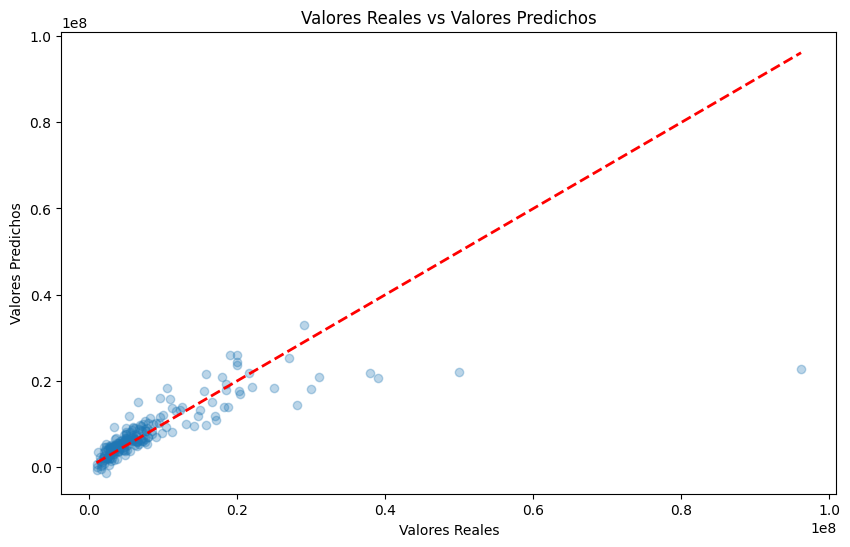

In [46]:
## Entrenamos y verificamos metricas sobre los datos de entrenamiento
best_model = ElasticNet(l1_ratio=0.15, alpha=0.1, tol=0.01)
best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
rmse = root_mean_squared_error(y_pred=y_pred, y_true=y_test)
mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
print(f'r2 :{r2}')
print(f'mse :{mse}')
print(f'rmse :{rmse}')
print(f'mae :{mae}')
draw_pred_vs_true(y_pred, y_test)

In [83]:
x_train.shape[1]

28

In [111]:
## Comparamos con una red neuronal para ver si logramos un mejor resultado
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Definir el modelo de red neuronal
modelo = Sequential()
modelo.add(Input(shape=(x_train.shape[1],)))
modelo.add(Dense(28, activation='relu'))
modelo.add(Dense(56, activation='relu'))
modelo.add(Dense(112, activation='relu'))
modelo.add(Dense(56, activation='relu'))
modelo.add(Dense(28, activation='relu'))
modelo.add(Dense(1))

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.30)
modelo.compile(loss='mean_absolute_error', optimizer=optimizer)

x_train,x_test,y_train,y_test = train_test_split(df_final, target, test_size=0.2, train_size=0.8, random_state=230)

# Entrenar el modelo
modelo.fit(x_train, y_train, epochs=300,verbose=0)
print(modelo.summary())
# Evaluar el modelo
y_pred = modelo.predict(x_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
rmse = root_mean_squared_error(y_pred=y_pred, y_true=y_test)
mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
print(f'r2 :{r2}')
print(f'mse :{mse}')
print(f'rmse :{rmse}')
print(f'mae :{mae}')

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_173 (Dense)               │ (None, 28)             │           812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 56)             │         1,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 112)            │         6,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 56)             │         6,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 28)             │         1,596 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,321 (196.57 KB)

 Trainable params: 16,773 (65.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,548 (131.05 KB)

None
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
r2 :0.7618017424001099
mse :21647756984450.227
rmse :4652715.012167651
mae :2059608.2334735577


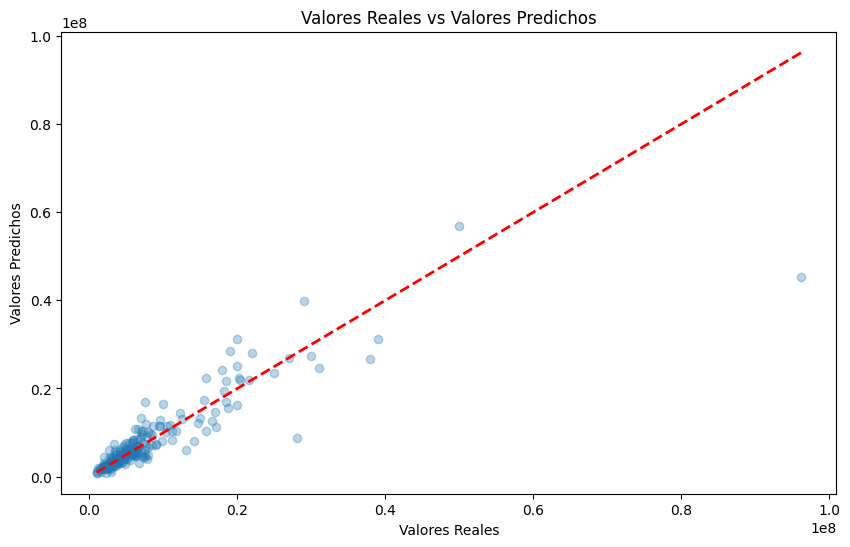

In [112]:
draw_pred_vs_true(y_pred, y_test)

In [102]:
modelo.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 2062824.6250


2008338.125

In [103]:
#modelo.save("red_neuronal_predictora_78.keras")

In [104]:
modelo.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_143 (Dense)               │ (None, 28)             │           812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 56)             │         1,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 112)            │         6,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 56)             │         6,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 28)             │         1,596 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,321 (196.57 KB)

 Trainable params: 16,773 (65.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,548 (131.05 KB)

In [113]:
## Leemos el mejor modelo que obtuvimos en alguna de las muchas iteraciones
model2 = tf.keras.models.load_model('red_neuronal_predictora_78.keras')
y_pred = model2.predict(x_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
rmse = root_mean_squared_error(y_pred=y_pred, y_true=y_test)
mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
print(f'r2 :{r2}')
print(f'mse :{mse}')
print(f'rmse :{rmse}')
print(f'mae :{mae}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
r2 :0.7807791174682415
mse :19923069290186.14
rmse :4463526.553095225
mae :2053246.6180889423


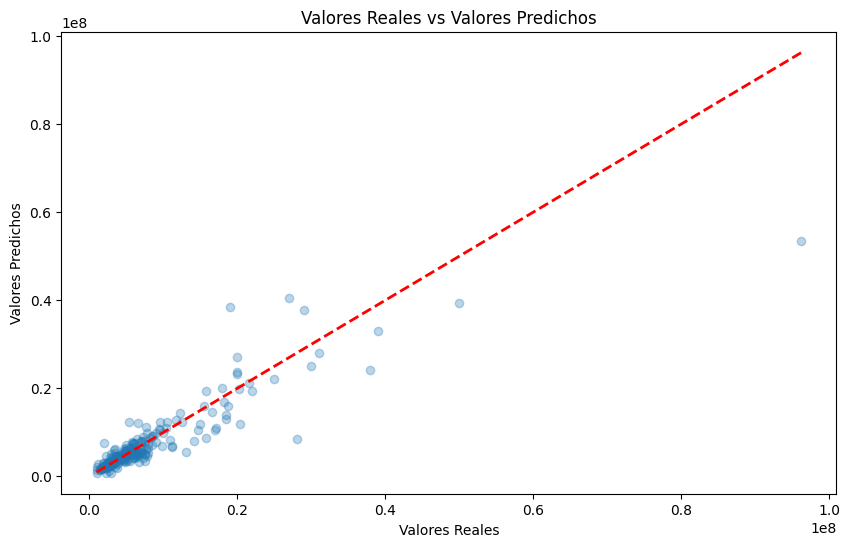

In [114]:
draw_pred_vs_true(y_pred, y_test)

In [105]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 56)             │         1,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 112)            │         6,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 56)             │         6,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │         1,596 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,885 (187.05 KB)

 Trainable params: 15,961 (62.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,924 (124.71 KB)